<a href="https://colab.research.google.com/github/EnriqueQM/bmw-pricing-proyecto/blob/main/BMW_Proyecto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## PASOS INICIALES

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,MinMaxScaler,OneHotEncoder,OrdinalEncoder

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## BWM PRICING


In [4]:
df_bmw = pd.read_csv("/content/drive/MyDrive/bmw_pricing_v3.csv", sep=",")
df_bmw.head()

marca modelo        km  potencia fecha_registro tipo_gasolina   color  \
0   NaN    118  140411.0     100.0     2012-02-01        diesel   black   
1   BMW     M4   13929.0     317.0            NaN        petrol    grey   
2   BMW    320  183297.0     120.0     2012-04-01        diesel   white   
3   BMW    420  128035.0     135.0            NaN        diesel     red   
4   BMW    425   97097.0     160.0            NaN        diesel  silver   

    tipo_coche volante_regulable aire_acondicionado camara_trasera  \
0          NaN              True               True          False   
1  convertible              True               True          False   
2          NaN             False              False          False   
3  convertible              True               True          False   
4          NaN              True               True          False   

  asientos_traseros_plegables elevalunas_electrico bluetooth   gps  \
0                         NaN                 True       NaN  True   
1                         NaN                False      True  True   
2                         NaN                 True     False  True   
3                         NaN                 True      True  True   
4                       False                False      True  True   

  alerta_lim_velocidad   precio fecha_venta  
0                  NaN  11300.0  2018-01-01  
1                 True  69700.0  2018-02-01  
2                False  10200.0  2018-02-01  
3                  NaN  25100.0  2018-02-01  
4                 True  33400.0  2018-04-01

In [5]:
df_bmw.shape

(4843, 18)

In [6]:
df_bmw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4843 entries, 0 to 4842
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   marca                        3873 non-null   object 
 1   modelo                       4840 non-null   object 
 2   km                           4841 non-null   float64
 3   potencia                     4842 non-null   float64
 4   fecha_registro               2420 non-null   object 
 5   tipo_gasolina                4838 non-null   object 
 6   color                        4398 non-null   object 
 7   tipo_coche                   3383 non-null   object 
 8   volante_regulable            4839 non-null   object 
 9   aire_acondicionado           4357 non-null   object 
 10  camara_trasera               4841 non-null   object 
 11  asientos_traseros_plegables  1452 non-null   object 
 12  elevalunas_electrico         4841 non-null   object 
 13  bluetooth         

In [7]:
df_bmw.describe()

km     potencia         precio
count  4.841000e+03  4842.000000    4837.000000
mean   1.409593e+05   128.981826   15831.920612
std    6.020853e+04    38.994839    9222.630708
min   -6.400000e+01     0.000000     100.000000
25%    1.028840e+05   100.000000   10800.000000
50%    1.410800e+05   120.000000   14200.000000
75%    1.752170e+05   135.000000   18600.000000
max    1.000376e+06   423.000000  178500.000000

## TRATAMIENTO DE DUPLICADOS

In [8]:
df_bmw.duplicated().sum()

0

##TRATAMIENTO DE NULOS

In [9]:
(df_bmw.isnull().sum() / len(df_bmw) * 100).sort_values(ascending=True)

gps                             0.000000
fecha_venta                     0.020648
potencia                        0.020648
km                              0.041297
elevalunas_electrico            0.041297
camara_trasera                  0.041297
modelo                          0.061945
volante_regulable               0.082593
tipo_gasolina                   0.103242
precio                          0.123890
color                           9.188520
aire_acondicionado             10.035102
bluetooth                      15.032005
alerta_lim_velocidad           15.032005
marca                          20.028908
tipo_coche                     30.146603
fecha_registro                 50.030973
asientos_traseros_plegables    70.018584
dtype: float64

MARCA

In [10]:
df_bmw["marca"].value_counts()

marca
BMW    3873
Name: count, dtype: int64

In [11]:
## Sabemos que el dataset es puramente de BWM así que rellenamos los nulos por BMW

df_bmw['marca'].fillna('BMW', inplace=True)

<ipython-input-11-aa21b68fd6a8>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_bmw['marca'].fillna('BMW', inplace=True)


In [12]:
(df_bmw.isnull().sum() / len(df_bmw) * 100).sort_values(ascending=True)

marca                           0.000000
gps                             0.000000
potencia                        0.020648
fecha_venta                     0.020648
camara_trasera                  0.041297
elevalunas_electrico            0.041297
km                              0.041297
modelo                          0.061945
volante_regulable               0.082593
tipo_gasolina                   0.103242
precio                          0.123890
color                           9.188520
aire_acondicionado             10.035102
bluetooth                      15.032005
alerta_lim_velocidad           15.032005
tipo_coche                     30.146603
fecha_registro                 50.030973
asientos_traseros_plegables    70.018584
dtype: float64

POTENCIA, FECHA_VENTA, CAMARA_TRASERA, Ee, KM, MODELO, VR, GASOLINA, PRECIO, AC, BLUETOOTH, AV

In [13]:
## Las columnas especificadas o tienen muy pocos nulos, o por decisión mas optima; se rellenan por el valor mas frecuente

In [14]:
def fill_columns_with_mode(dataframe, columns):
  for column in columns:
        if column in dataframe.columns:
            if not dataframe[column].dropna().empty:
                mode_value = dataframe[column].mode()[0]
                dataframe.loc[dataframe[column].isnull(), column] = mode_value
            else:
                print(f"La columna '{column}' está vacía y no se puede rellenar.")
        else:
            print(f"La columna '{column}' no existe en el DataFrame.")

In [15]:
fill_columns_with_mode(df_bmw, ['potencia', 'fecha_venta', 'camara_trasera', 'elevalunas_electrico', 'km', 'modelo', 'volante_regulable', 'tipo_gasolina', 'precio', 'aire_acondicionado', 'bluetooth', 'alerta_lim_velocidad'])

In [16]:
(df_bmw.isnull().sum() / len(df_bmw) * 100).sort_values(ascending=True)

marca                           0.000000
alerta_lim_velocidad            0.000000
gps                             0.000000
bluetooth                       0.000000
elevalunas_electrico            0.000000
camara_trasera                  0.000000
aire_acondicionado              0.000000
precio                          0.000000
volante_regulable               0.000000
tipo_gasolina                   0.000000
potencia                        0.000000
km                              0.000000
modelo                          0.000000
fecha_venta                     0.000000
color                           9.188520
tipo_coche                     30.146603
fecha_registro                 50.030973
asientos_traseros_plegables    70.018584
dtype: float64

(Error en tipo de gasolina[Diesel, diesel])

In [17]:
df_bmw['tipo_gasolina'].value_counts()

tipo_gasolina
diesel           4636
petrol            191
hybrid_petrol       8
Diesel              5
electro             3
Name: count, dtype: int64

In [18]:
df_bmw.loc[df_bmw['tipo_gasolina'] == 'diesel', 'tipo_gasolina'] = 'Diesel'

In [19]:
df_bmw['tipo_gasolina'].value_counts()

tipo_gasolina
Diesel           4641
petrol            191
hybrid_petrol       8
electro             3
Name: count, dtype: int64

COLOR, TIPO_COCHE

In [20]:
df_bmw['color'] = df_bmw['color'].fillna('sin especificar')
df_bmw['tipo_coche'] = df_bmw['tipo_coche'].fillna('sin especificar')

In [21]:
(df_bmw.isnull().sum() / len(df_bmw) * 100).sort_values(ascending=True)

marca                           0.000000
alerta_lim_velocidad            0.000000
gps                             0.000000
bluetooth                       0.000000
elevalunas_electrico            0.000000
camara_trasera                  0.000000
aire_acondicionado              0.000000
precio                          0.000000
volante_regulable               0.000000
color                           0.000000
tipo_gasolina                   0.000000
potencia                        0.000000
km                              0.000000
modelo                          0.000000
tipo_coche                      0.000000
fecha_venta                     0.000000
fecha_registro                 50.030973
asientos_traseros_plegables    70.018584
dtype: float64

FECHA_REGISTRO, ASIENTOS_TRASEROS_PLEGABLES

In [22]:
## Las dos ultimas columnas como se puede ver tienen una cantidad considerable de nulos por lo que rellenarlos por el valor mas frecuente o media no seria lo mas 'accurate' posible
## asi que se toma la decision de borrar estas columnas

In [23]:
df_bmw.drop(['fecha_registro', 'asientos_traseros_plegables'], axis=1, inplace=True)

MARCA - MODELO

In [24]:
## Marca, modelo son dos columnas las cuales podemos unir para mayor simplicidad

In [25]:
df_bmw['marca_modelo'] = df_bmw['marca'] + ' ' + df_bmw['modelo']

In [26]:
## Eliminamos las columnas que acabamos de unir

In [27]:
df_bmw.drop(['marca', 'modelo'], axis=1, inplace=True)

In [28]:
(df_bmw.isnull().sum() / len(df_bmw) * 100).sort_values(ascending=True)

km                      0.0
potencia                0.0
tipo_gasolina           0.0
color                   0.0
tipo_coche              0.0
volante_regulable       0.0
aire_acondicionado      0.0
camara_trasera          0.0
elevalunas_electrico    0.0
bluetooth               0.0
gps                     0.0
alerta_lim_velocidad    0.0
precio                  0.0
fecha_venta             0.0
marca_modelo            0.0
dtype: float64

## OUTLIERS

In [29]:
df_bmw.describe()

km     potencia         precio
count  4.843000e+03  4843.000000    4843.000000
mean   1.409236e+05   128.983068   15828.536031
std    6.022177e+04    38.990908    9217.415859
min   -6.400000e+01     0.000000     100.000000
25%    1.028070e+05   100.000000   10850.000000
50%    1.410680e+05   120.000000   14200.000000
75%    1.751955e+05   135.000000   18600.000000
max    1.000376e+06   423.000000  178500.000000

In [30]:
df_bmw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4843 entries, 0 to 4842
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   km                    4843 non-null   float64
 1   potencia              4843 non-null   float64
 2   tipo_gasolina         4843 non-null   object 
 3   color                 4843 non-null   object 
 4   tipo_coche            4843 non-null   object 
 5   volante_regulable     4843 non-null   object 
 6   aire_acondicionado    4843 non-null   object 
 7   camara_trasera        4843 non-null   object 
 8   elevalunas_electrico  4843 non-null   object 
 9   bluetooth             4843 non-null   object 
 10  gps                   4843 non-null   bool   
 11  alerta_lim_velocidad  4843 non-null   object 
 12  precio                4843 non-null   float64
 13  fecha_venta           4843 non-null   object 
 14  marca_modelo          4843 non-null   object 
dtypes: bool(1), float64(3

In [31]:
def visualize_hist_multiple(dataframe, columns):

  for column in columns:
        if column in dataframe.columns:
            dataframe[column].hist(bins=30, edgecolor='black')
            plt.title(f'Histograma de {column}')
            plt.xlabel(column)
            plt.ylabel('Frecuencia')
            plt.show()
        else:
            print(f"La columna '{column}' no existe en el DataFrame.")

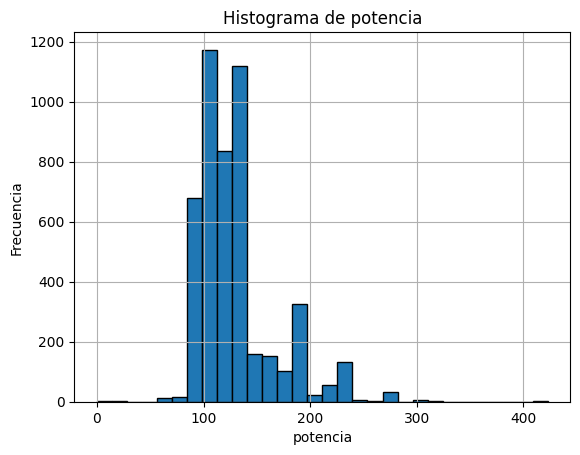

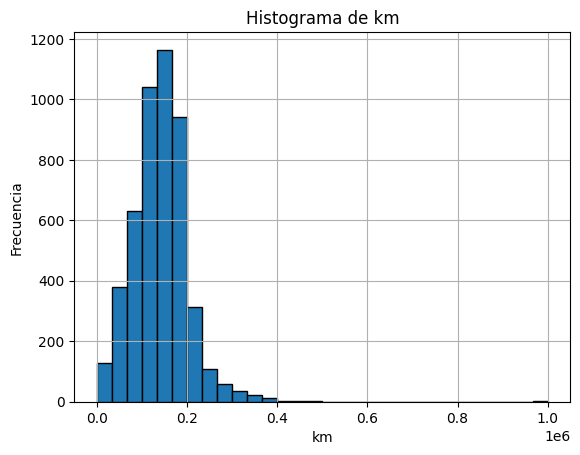

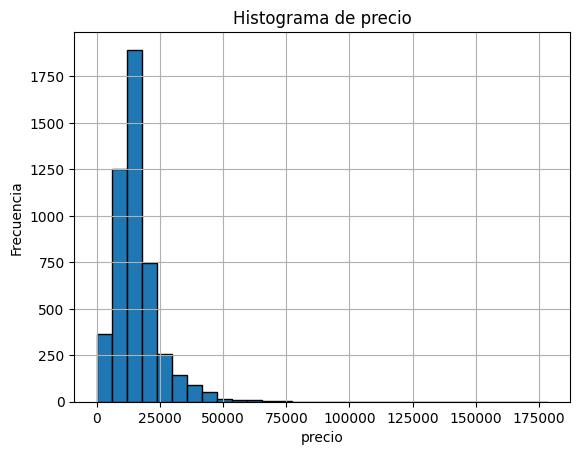

In [32]:
visualize_hist_multiple(df_bmw, ['potencia', 'km', 'precio'])

POTENCIA

In [33]:
df_bmw['potencia'].describe()

count    4843.000000
mean      128.983068
std        38.990908
min         0.000000
25%       100.000000
50%       120.000000
75%       135.000000
max       423.000000
Name: potencia, dtype: float64

In [34]:
## Por conocimiento general sabemos que un coche no puede tener potencia '0' y luego de investigar hemos visto que la potencia minima para que se considere como una prestación digna es de 75CV
## y los coches arriba de 400CV son pocos y raros.
## así que eliminamos los outliers de la potencia

In [35]:
df_bmw.drop(df_bmw[((df_bmw["potencia"]<=75) | (df_bmw["potencia"]>=400))].index, inplace=True)

<Axes: >

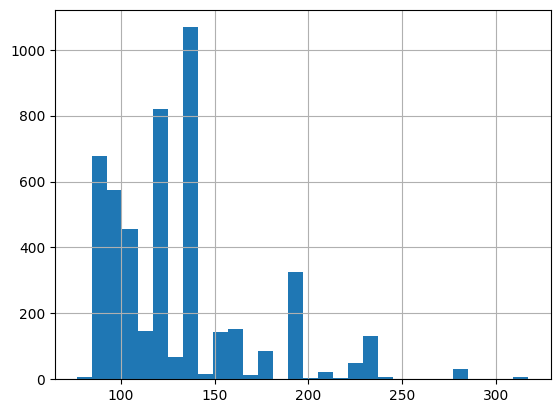

In [36]:
df_bmw['potencia'].hist(bins = 30)

KM

In [37]:
df_bmw['km'].describe()

count    4.816000e+03
mean     1.412020e+05
std      6.001749e+04
min     -6.400000e+01
25%      1.033200e+05
50%      1.412870e+05
75%      1.752695e+05
max      1.000376e+06
Name: km, dtype: float64

<Axes: >

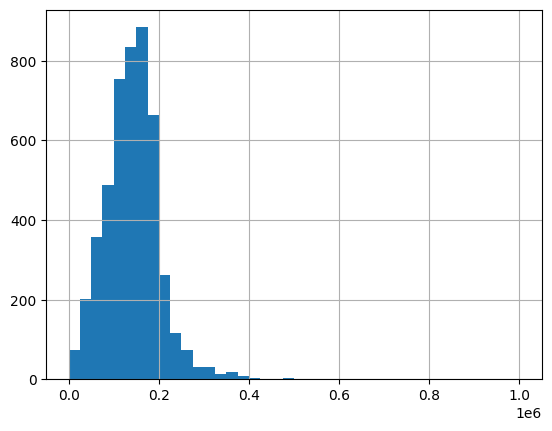

In [38]:
df_bmw['km'].hist(bins = 40)

<Axes: xlabel='km'>

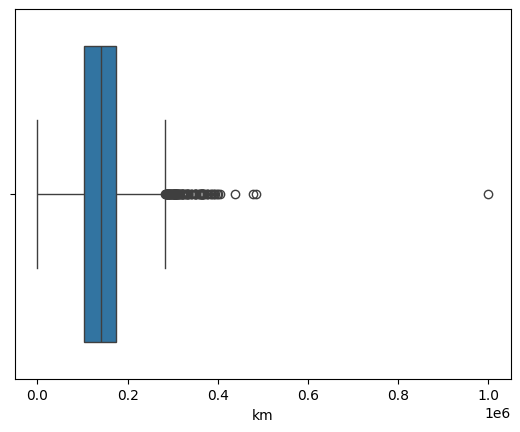

In [39]:
sns.boxplot(x = df_bmw['km'])

In [40]:
df_bmw.drop(df_bmw[((df_bmw["km"]<=0) | (df_bmw["km"]>=500000))].index, inplace=True)

<Axes: xlabel='km'>

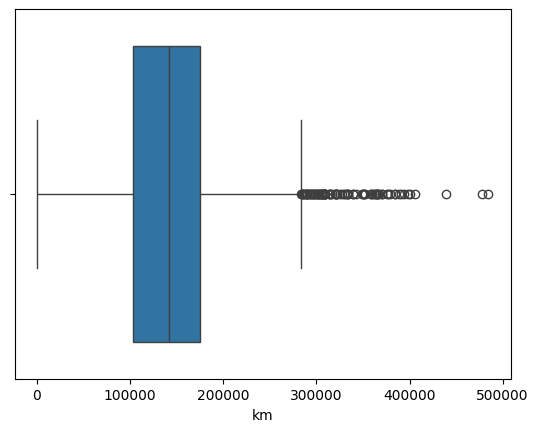

In [41]:
sns.boxplot(x = df_bmw['km'])

PRECIO

<Axes: xlabel='precio'>

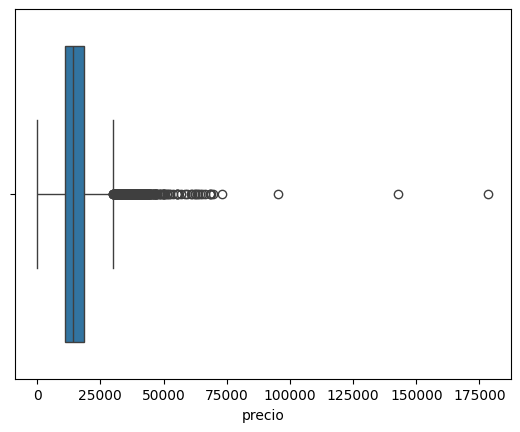

In [42]:
sns.boxplot(x = df_bmw['precio'])

In [43]:
## Creamos una variable 'LOG PRECIO' que este mejor distribuida

In [44]:
df_bmw["LOG_PRECIO"]=np.log10(df_bmw["precio"])

<Axes: xlabel='LOG_PRECIO'>

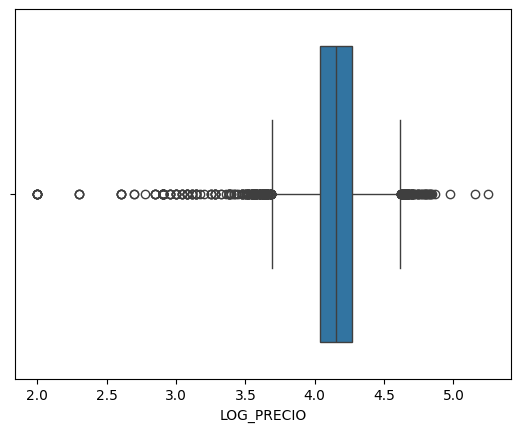

In [45]:
sns.boxplot(x = df_bmw['LOG_PRECIO'])

## BOOL A NUMERICAS

In [46]:
df_bmw.head()

km  potencia tipo_gasolina   color       tipo_coche  \
0  140411.0     100.0        Diesel   black  sin especificar   
1   13929.0     317.0        petrol    grey      convertible   
2  183297.0     120.0        Diesel   white  sin especificar   
3  128035.0     135.0        Diesel     red      convertible   
4   97097.0     160.0        Diesel  silver  sin especificar   

  volante_regulable aire_acondicionado camara_trasera elevalunas_electrico  \
0              True               True          False                 True   
1              True               True          False                False   
2             False              False          False                 True   
3              True               True          False                 True   
4              True               True          False                False   

  bluetooth   gps alerta_lim_velocidad   precio fecha_venta marca_modelo  \
0     False  True                 True  11300.0  2018-01-01      BMW 118   
1      True  True                 True  69700.0  2018-02-01       BMW M4   
2     False  True                False  10200.0  2018-02-01      BMW 320   
3      True  True                 True  25100.0  2018-02-01      BMW 420   
4      True  True                 True  33400.0  2018-04-01      BMW 425   

   LOG_PRECIO  
0    4.053078  
1    4.843233  
2    4.008600  
3    4.399674  
4    4.523746

In [47]:
def bool_to_numeric(dataframe, columns):

    for col in columns:
      dataframe[col] = dataframe[col].astype('int64')

In [48]:
bool_to_numeric(df_bmw, ['elevalunas_electrico', 'volante_regulable', 'aire_acondicionado', 'bluetooth', 'alerta_lim_velocidad', 'camara_trasera', 'gps'])

In [49]:
df_bmw.head()

km  potencia tipo_gasolina   color       tipo_coche  \
0  140411.0     100.0        Diesel   black  sin especificar   
1   13929.0     317.0        petrol    grey      convertible   
2  183297.0     120.0        Diesel   white  sin especificar   
3  128035.0     135.0        Diesel     red      convertible   
4   97097.0     160.0        Diesel  silver  sin especificar   

   volante_regulable  aire_acondicionado  camara_trasera  \
0                  1                   1               0   
1                  1                   1               0   
2                  0                   0               0   
3                  1                   1               0   
4                  1                   1               0   

   elevalunas_electrico  bluetooth  gps  alerta_lim_velocidad   precio  \
0                     1          0    1                     1  11300.0   
1                     0          1    1                     1  69700.0   
2                     1          0    1                     0  10200.0   
3                     1          1    1                     1  25100.0   
4                     0          1    1                     1  33400.0   

  fecha_venta marca_modelo  LOG_PRECIO  
0  2018-01-01      BMW 118    4.053078  
1  2018-02-01       BMW M4    4.843233  
2  2018-02-01      BMW 320    4.008600  
3  2018-02-01      BMW 420    4.399674  
4  2018-04-01      BMW 425    4.523746

In [50]:
df_bmw.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4814 entries, 0 to 4842
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   km                    4814 non-null   float64
 1   potencia              4814 non-null   float64
 2   tipo_gasolina         4814 non-null   object 
 3   color                 4814 non-null   object 
 4   tipo_coche            4814 non-null   object 
 5   volante_regulable     4814 non-null   int64  
 6   aire_acondicionado    4814 non-null   int64  
 7   camara_trasera        4814 non-null   int64  
 8   elevalunas_electrico  4814 non-null   int64  
 9   bluetooth             4814 non-null   int64  
 10  gps                   4814 non-null   int64  
 11  alerta_lim_velocidad  4814 non-null   int64  
 12  precio                4814 non-null   float64
 13  fecha_venta           4814 non-null   object 
 14  marca_modelo          4814 non-null   object 
 15  LOG_PRECIO            4814

## CORRELACIONES

In [51]:
df_bmw.head()

km  potencia tipo_gasolina   color       tipo_coche  \
0  140411.0     100.0        Diesel   black  sin especificar   
1   13929.0     317.0        petrol    grey      convertible   
2  183297.0     120.0        Diesel   white  sin especificar   
3  128035.0     135.0        Diesel     red      convertible   
4   97097.0     160.0        Diesel  silver  sin especificar   

   volante_regulable  aire_acondicionado  camara_trasera  \
0                  1                   1               0   
1                  1                   1               0   
2                  0                   0               0   
3                  1                   1               0   
4                  1                   1               0   

   elevalunas_electrico  bluetooth  gps  alerta_lim_velocidad   precio  \
0                     1          0    1                     1  11300.0   
1                     0          1    1                     1  69700.0   
2                     1          0    1                     0  10200.0   
3                     1          1    1                     1  25100.0   
4                     0          1    1                     1  33400.0   

  fecha_venta marca_modelo  LOG_PRECIO  
0  2018-01-01      BMW 118    4.053078  
1  2018-02-01       BMW M4    4.843233  
2  2018-02-01      BMW 320    4.008600  
3  2018-02-01      BMW 420    4.399674  
4  2018-04-01      BMW 425    4.523746

In [52]:
df_bmw.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4814 entries, 0 to 4842
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   km                    4814 non-null   float64
 1   potencia              4814 non-null   float64
 2   tipo_gasolina         4814 non-null   object 
 3   color                 4814 non-null   object 
 4   tipo_coche            4814 non-null   object 
 5   volante_regulable     4814 non-null   int64  
 6   aire_acondicionado    4814 non-null   int64  
 7   camara_trasera        4814 non-null   int64  
 8   elevalunas_electrico  4814 non-null   int64  
 9   bluetooth             4814 non-null   int64  
 10  gps                   4814 non-null   int64  
 11  alerta_lim_velocidad  4814 non-null   int64  
 12  precio                4814 non-null   float64
 13  fecha_venta           4814 non-null   object 
 14  marca_modelo          4814 non-null   object 
 15  LOG_PRECIO            4814

In [53]:
corr = df_bmw.corr(numeric_only = True)

In [54]:
corr.style.background_gradient(cmap='coolwarm')

ANALIZAMOS EL PRECIO

In [55]:
df_bmw2 = df_bmw.copy()

In [56]:
df_bmw2.head()

km  potencia tipo_gasolina   color       tipo_coche  \
0  140411.0     100.0        Diesel   black  sin especificar   
1   13929.0     317.0        petrol    grey      convertible   
2  183297.0     120.0        Diesel   white  sin especificar   
3  128035.0     135.0        Diesel     red      convertible   
4   97097.0     160.0        Diesel  silver  sin especificar   

   volante_regulable  aire_acondicionado  camara_trasera  \
0                  1                   1               0   
1                  1                   1               0   
2                  0                   0               0   
3                  1                   1               0   
4                  1                   1               0   

   elevalunas_electrico  bluetooth  gps  alerta_lim_velocidad   precio  \
0                     1          0    1                     1  11300.0   
1                     0          1    1                     1  69700.0   
2                     1          0    1                     0  10200.0   
3                     1          1    1                     1  25100.0   
4                     0          1    1                     1  33400.0   

  fecha_venta marca_modelo  LOG_PRECIO  
0  2018-01-01      BMW 118    4.053078  
1  2018-02-01       BMW M4    4.843233  
2  2018-02-01      BMW 320    4.008600  
3  2018-02-01      BMW 420    4.399674  
4  2018-04-01      BMW 425    4.523746

array([[<Axes: title={'center': 'precio'}>]], dtype=object)

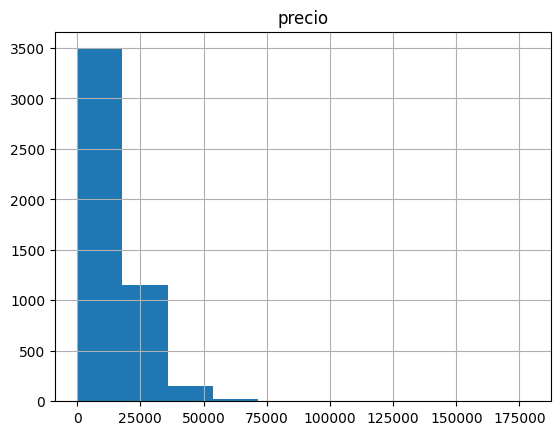

In [57]:
df_bmw2.hist('precio')

<Axes: xlabel='precio'>

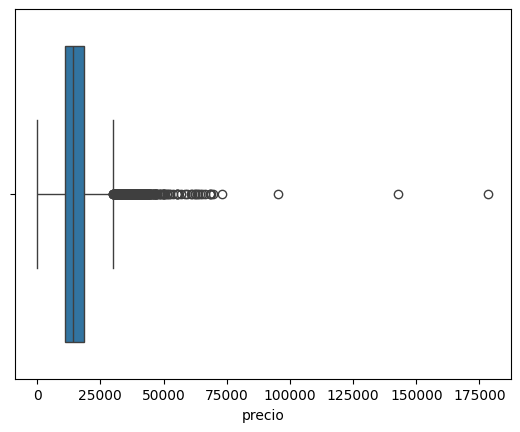

In [58]:
sns.boxplot(x = df_bmw2['precio'])

array([[<Axes: title={'center': 'LOG_PRECIO'}>]], dtype=object)

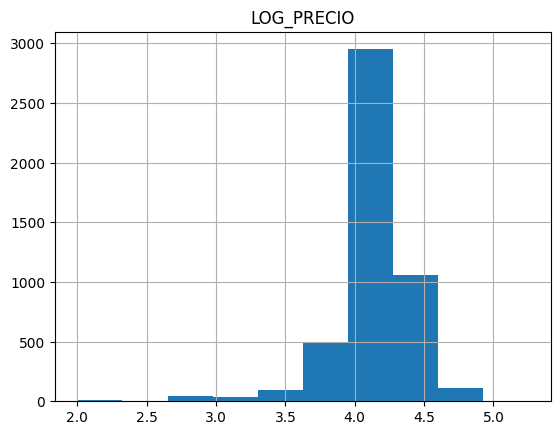

In [59]:
df_bmw2.hist('LOG_PRECIO')

<Axes: xlabel='LOG_PRECIO'>

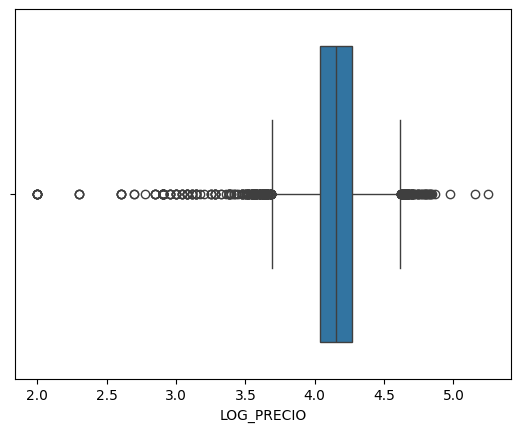

In [60]:
sns.boxplot(x = df_bmw2['LOG_PRECIO'])

In [61]:
## Analizando el precio podemos observar que aun obteniendo el LOG del precio no esta lo suficientemente distribuido.
## Para ayudar a la distribución y reducir el sesgo obtendremos la raíz del precio

<Axes: xlabel='PRECIO_RAIZ'>

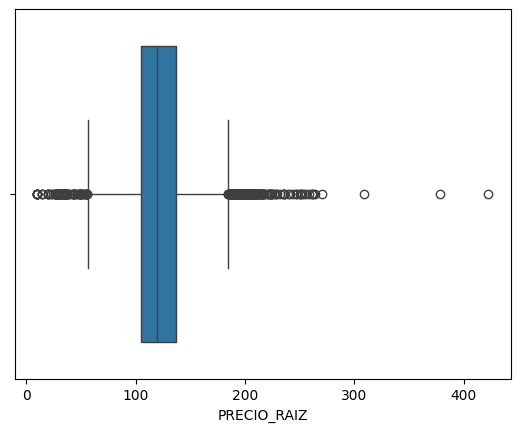

In [62]:
df_bmw2['PRECIO_RAIZ'] = df_bmw2['precio'] ** 0.5
sns.boxplot(x = df_bmw2['PRECIO_RAIZ'])

#ESTUDIAMOS LAS VARIABLES EN RELACIÓN CON EL TARGET


In [105]:
def visualize_data(dataframe, target, exclude_cols = None):
    """
    Visualiza los datos del DataFrame excluyendo ciertas columnas.
    """
    if exclude_cols:
        dataframe = dataframe.drop(columns=exclude_cols, errors='ignore')

    for i in dataframe.columns:
        if i == target:
            continue

        if dataframe[i].dtype.kind in ('O', 'b'):
            plt.figure(figsize=(20, 6))
            sns.violinplot(x=i, y=target, data=dataframe, inner="box", palette="muted")
            plt.title(f"Gráfico de violín para {i} vs {target}")
            plt.xlabel(i)
            plt.ylabel(target)
            plt.show()

        elif dataframe[i].dtype.kind in ('i', 'f'):
            plt.figure(figsize=(20, 6))
            sns.scatterplot(x=i, y=target, data=dataframe, hue=target, palette="coolwarm", alpha=0.6)
            plt.title(f"Gráfico de dispersión para {i} vs {target}")
            plt.xlabel(i)
            plt.ylabel(target)
            plt.show()

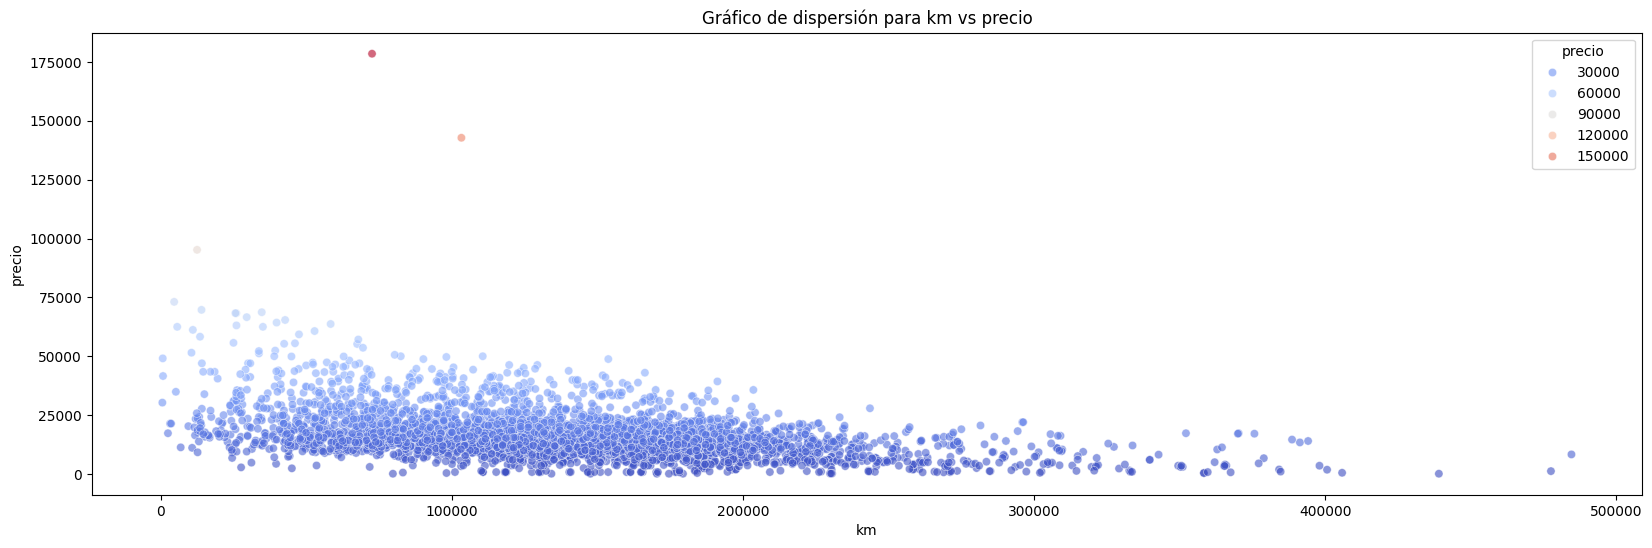

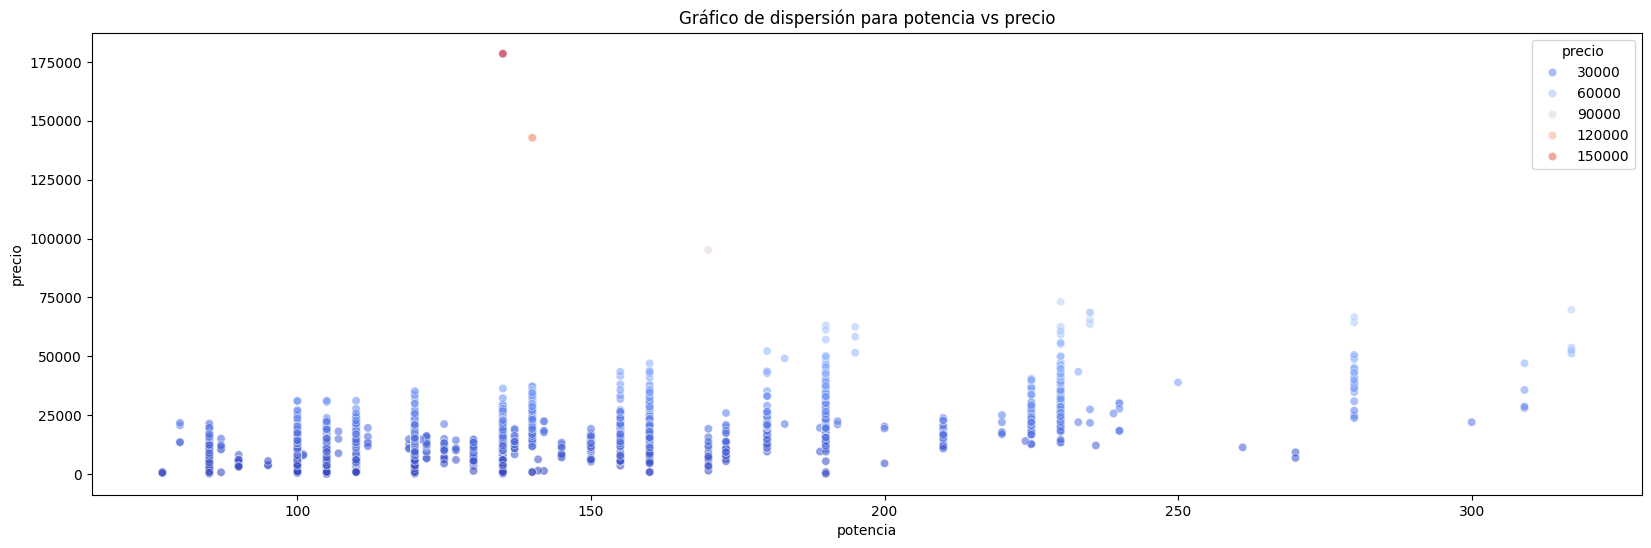

<ipython-input-102-27e4a2451a36>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=i, y=target, data=dataframe, inner="box", palette="muted")


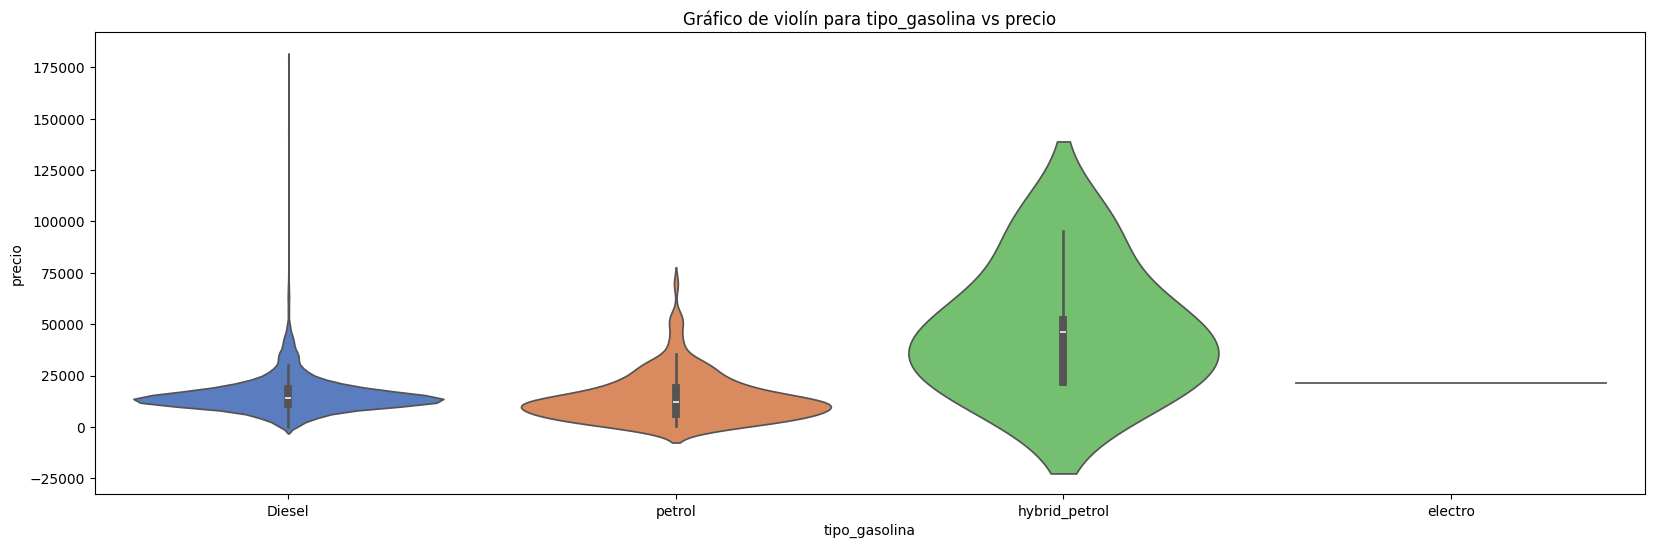

<ipython-input-102-27e4a2451a36>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=i, y=target, data=dataframe, inner="box", palette="muted")


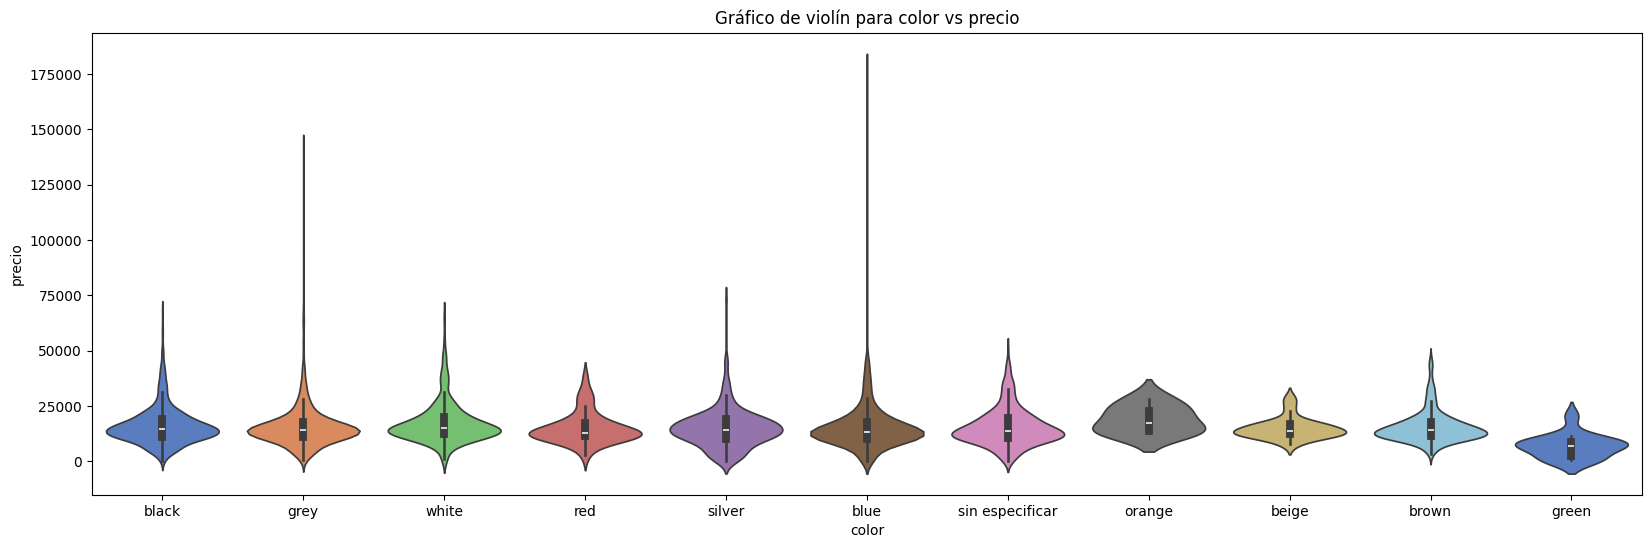

<ipython-input-102-27e4a2451a36>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=i, y=target, data=dataframe, inner="box", palette="muted")


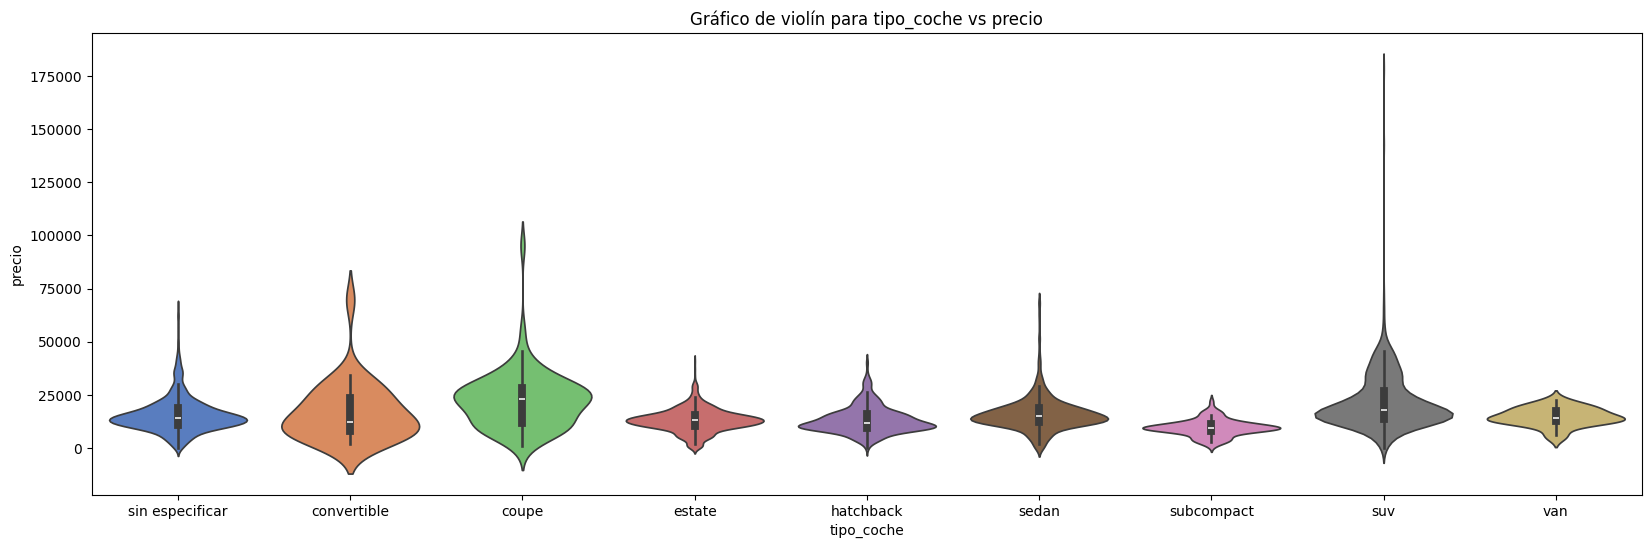

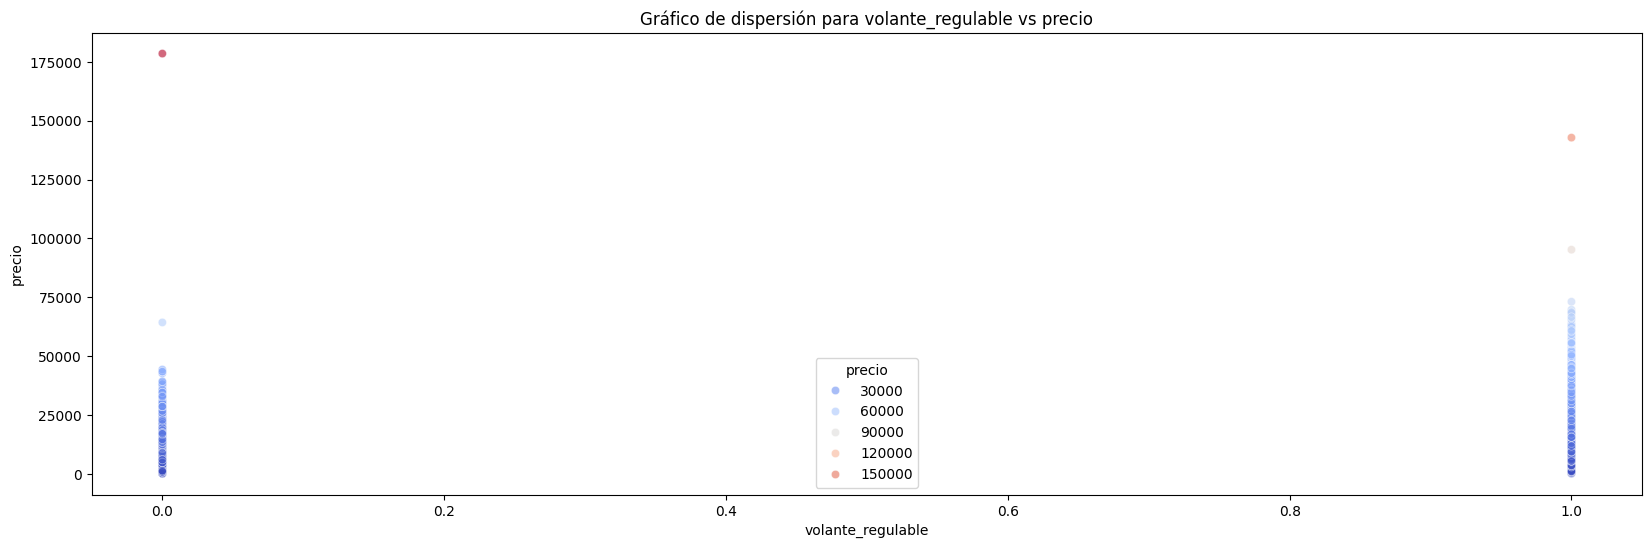

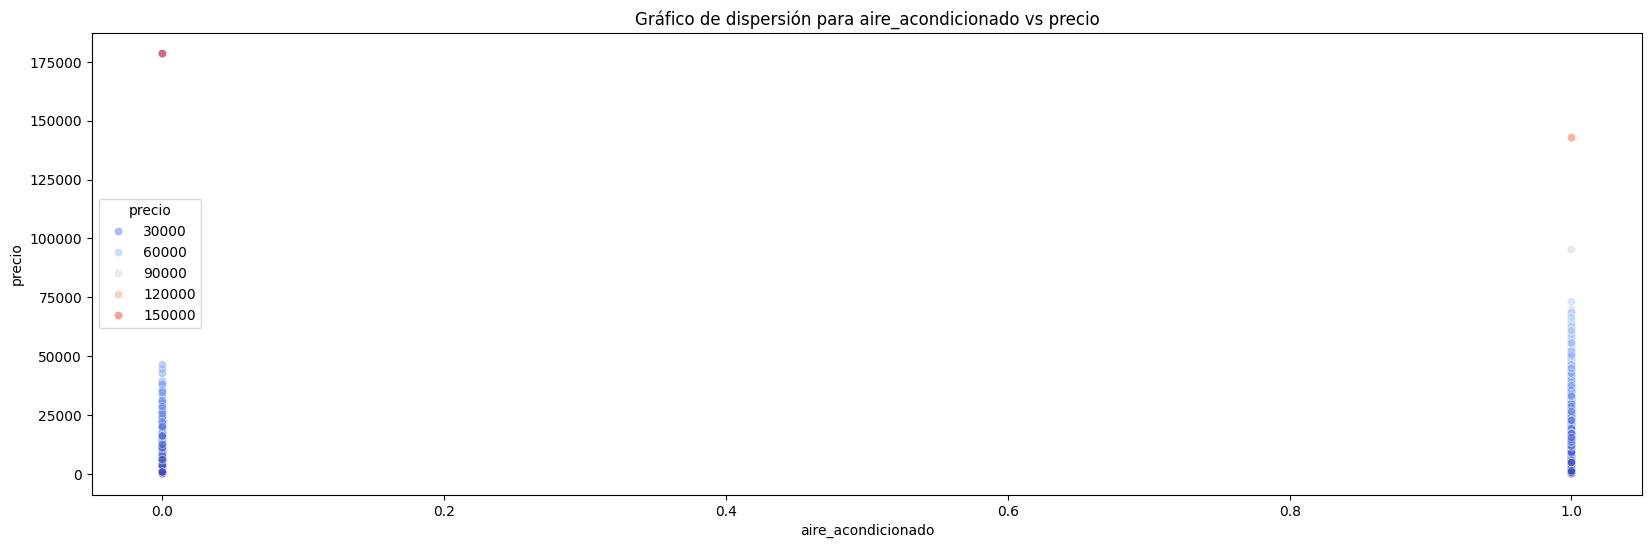

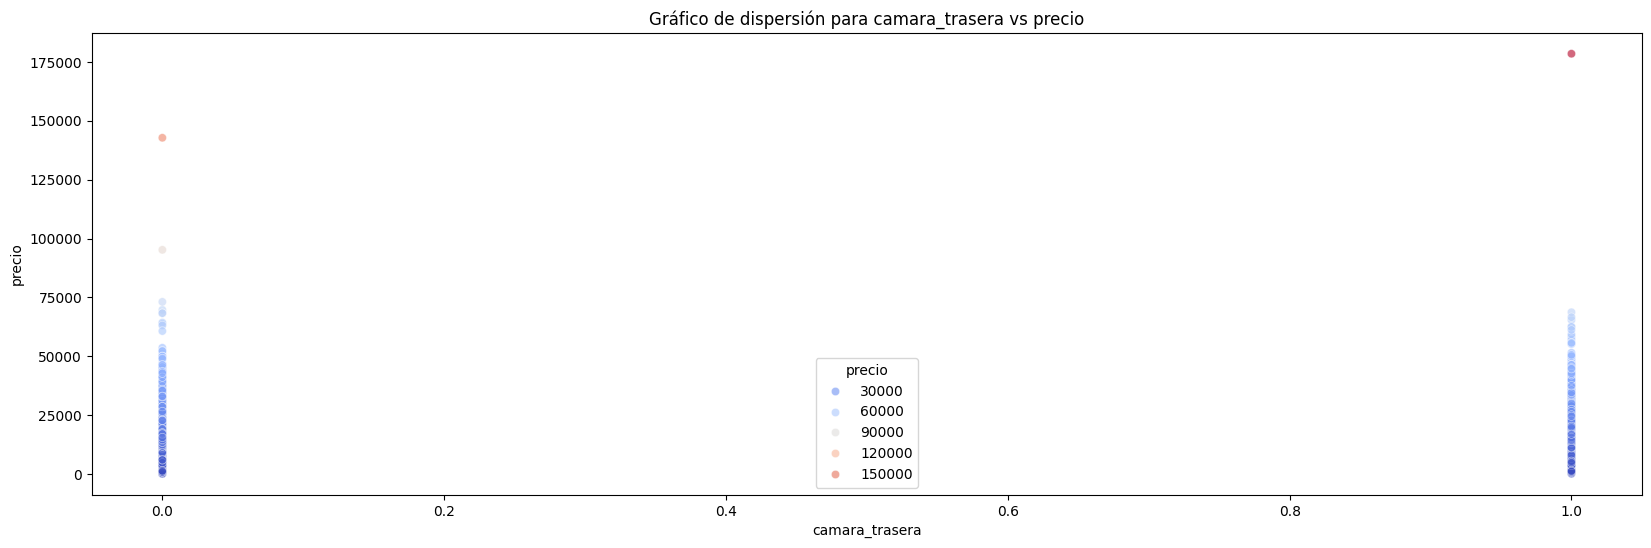

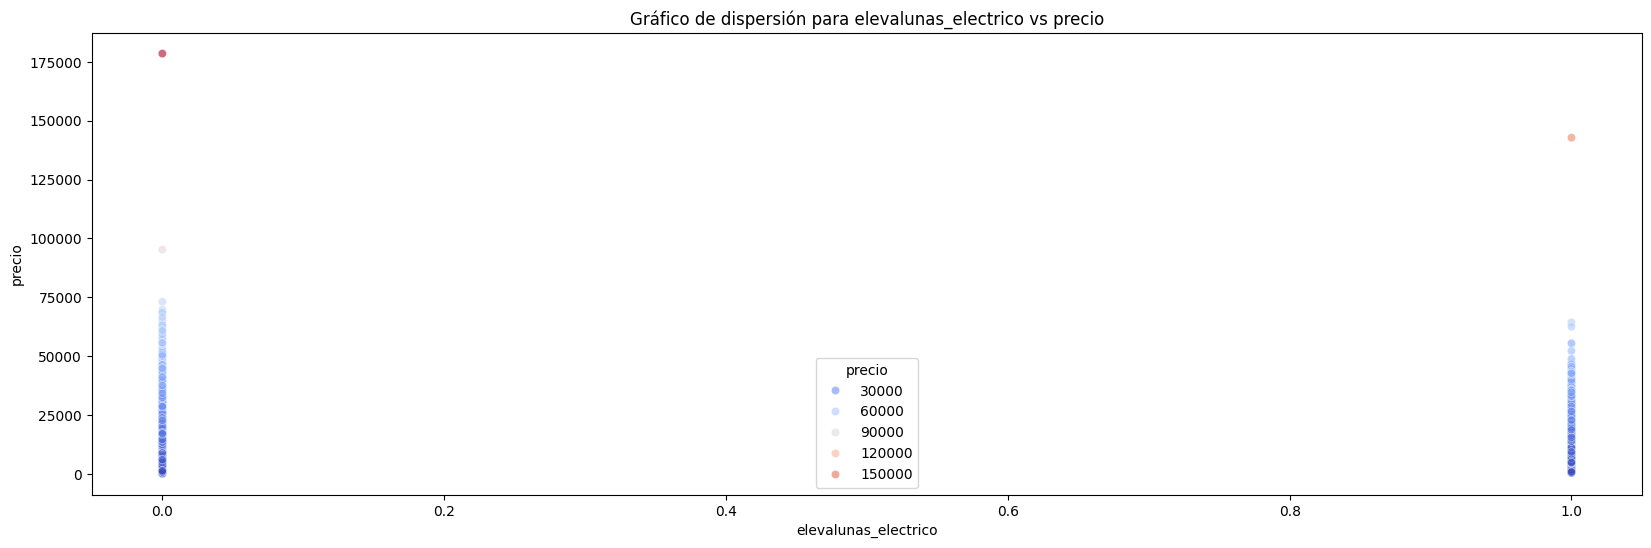

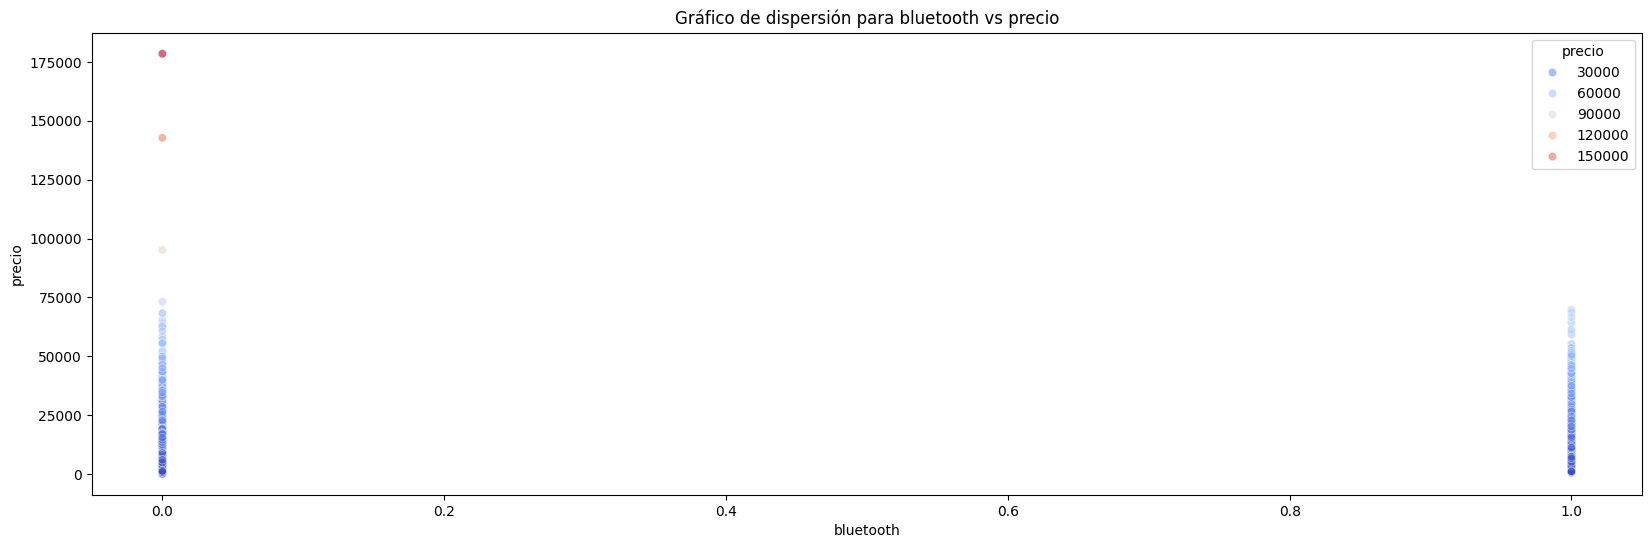

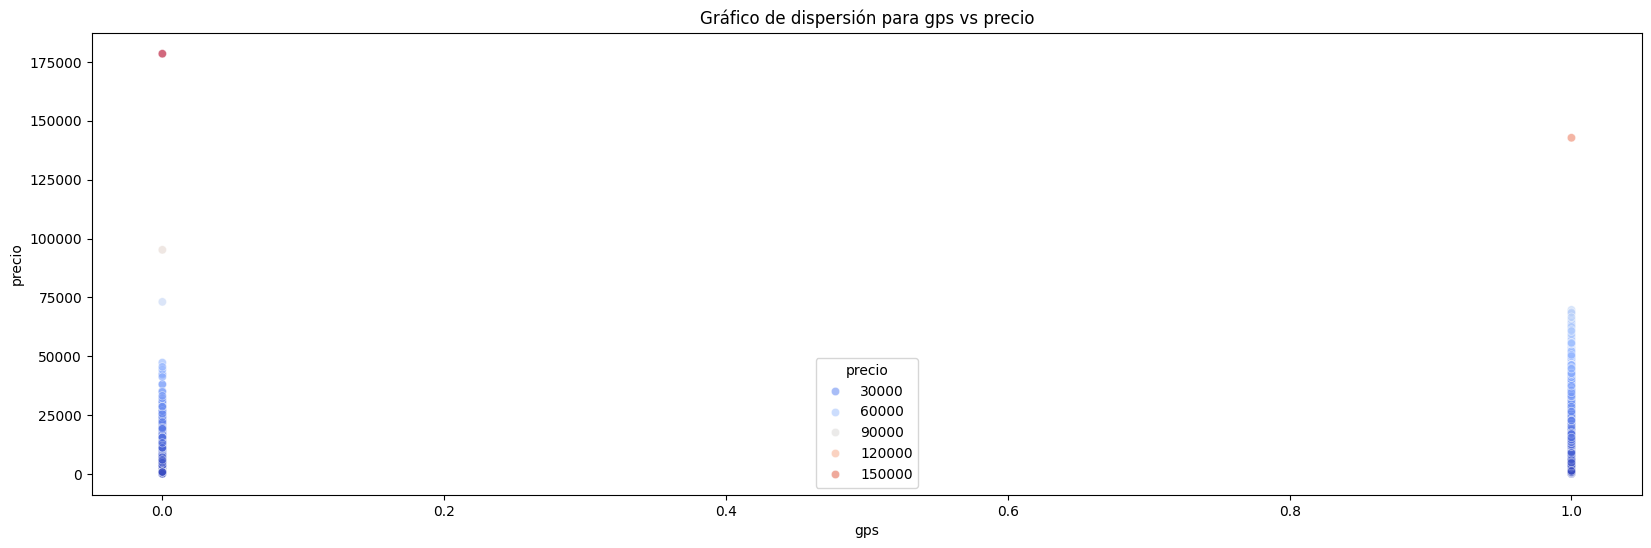

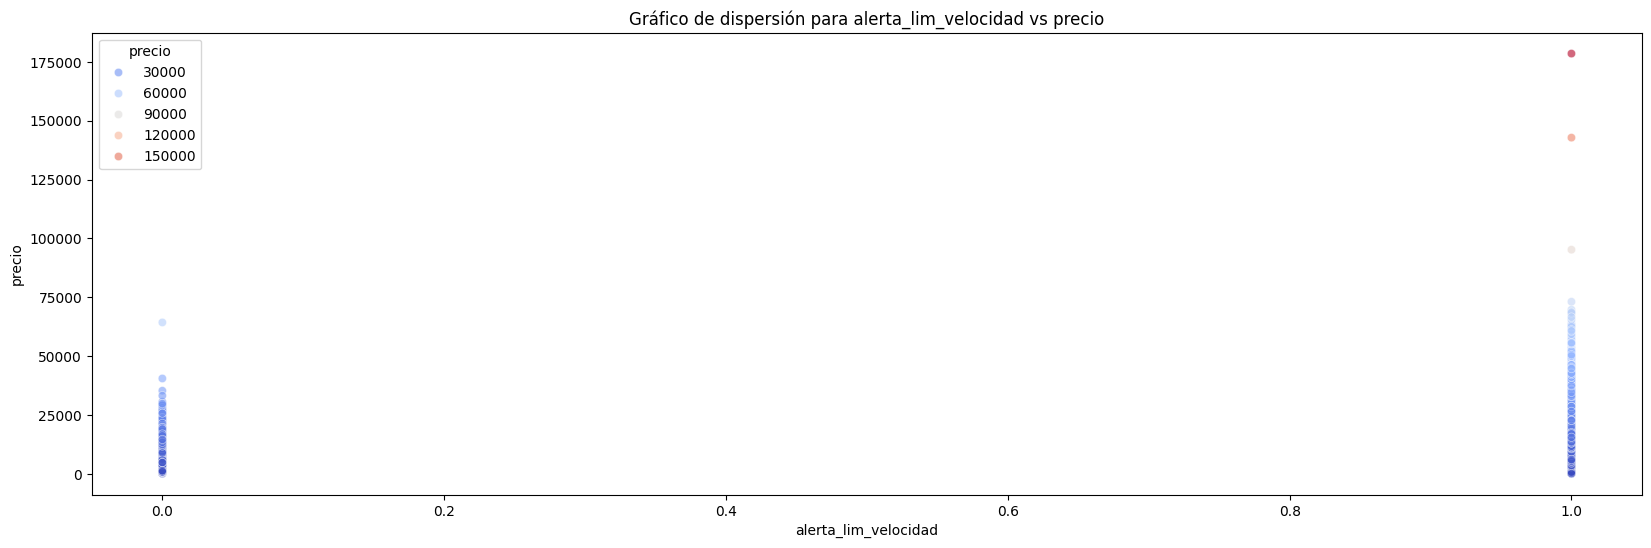

<ipython-input-102-27e4a2451a36>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=i, y=target, data=dataframe, inner="box", palette="muted")


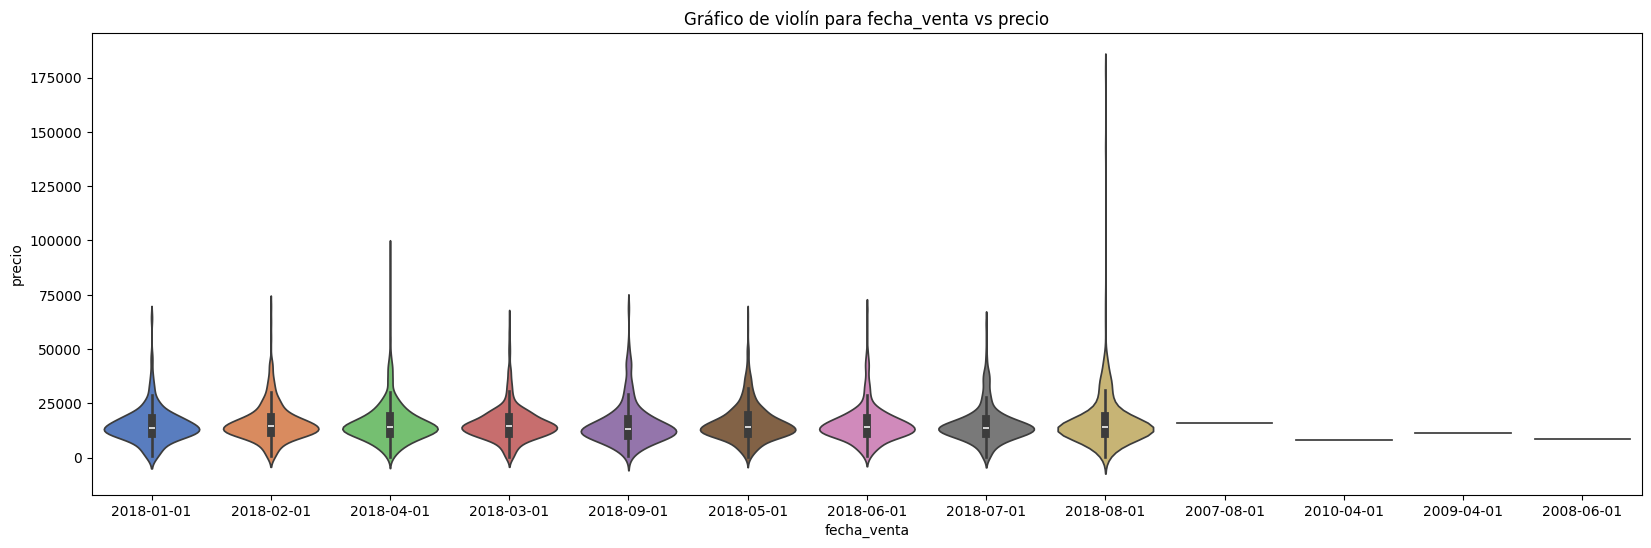

In [103]:
visualize_data(df_bmw2, 'precio', exclude_cols = ['PRECIO_RAIZ', 'LOG_PRECIO', 'marca_modelo'])

## Analizamos maca_modelo por separado para mejor visualización

In [108]:
df_marca_modelo = df_bmw2.groupby('marca_modelo').agg({'precio': 'mean', 'PRECIO_RAIZ': 'mean'}).reset_index()

In [110]:
df_marca_modelo_head = df_marca_modelo.head(5)

In [111]:
df_marca_modelo_tail = df_marca_modelo.tail(5)

In [117]:
df_marca_modelo_2 = pd.concat([df_marca_modelo_head, df_marca_modelo_tail]).reset_index(drop=True)

In [118]:
df_marca_modelo_2

marca_modelo        precio  PRECIO_RAIZ
0  BMW  Active Tourer  19000.000000   137.840488
1             BMW 116   9653.910615    97.116658
2             BMW 118   9705.633803    95.782393
3             BMW 120  12416.666667   109.624879
4             BMW 123   8800.000000    92.755431
5              BMW X6  34461.363636   182.313100
6            BMW X6 M  46571.428571   214.619449
7              BMW Z4   9500.000000    94.695806
8              BMW i3  21200.000000   145.602198
9              BMW i8  95200.000000   308.544972

<ipython-input-129-2cf7b6db407f>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_marca_modelo_2, x='marca_modelo', y='precio', palette='viridis')


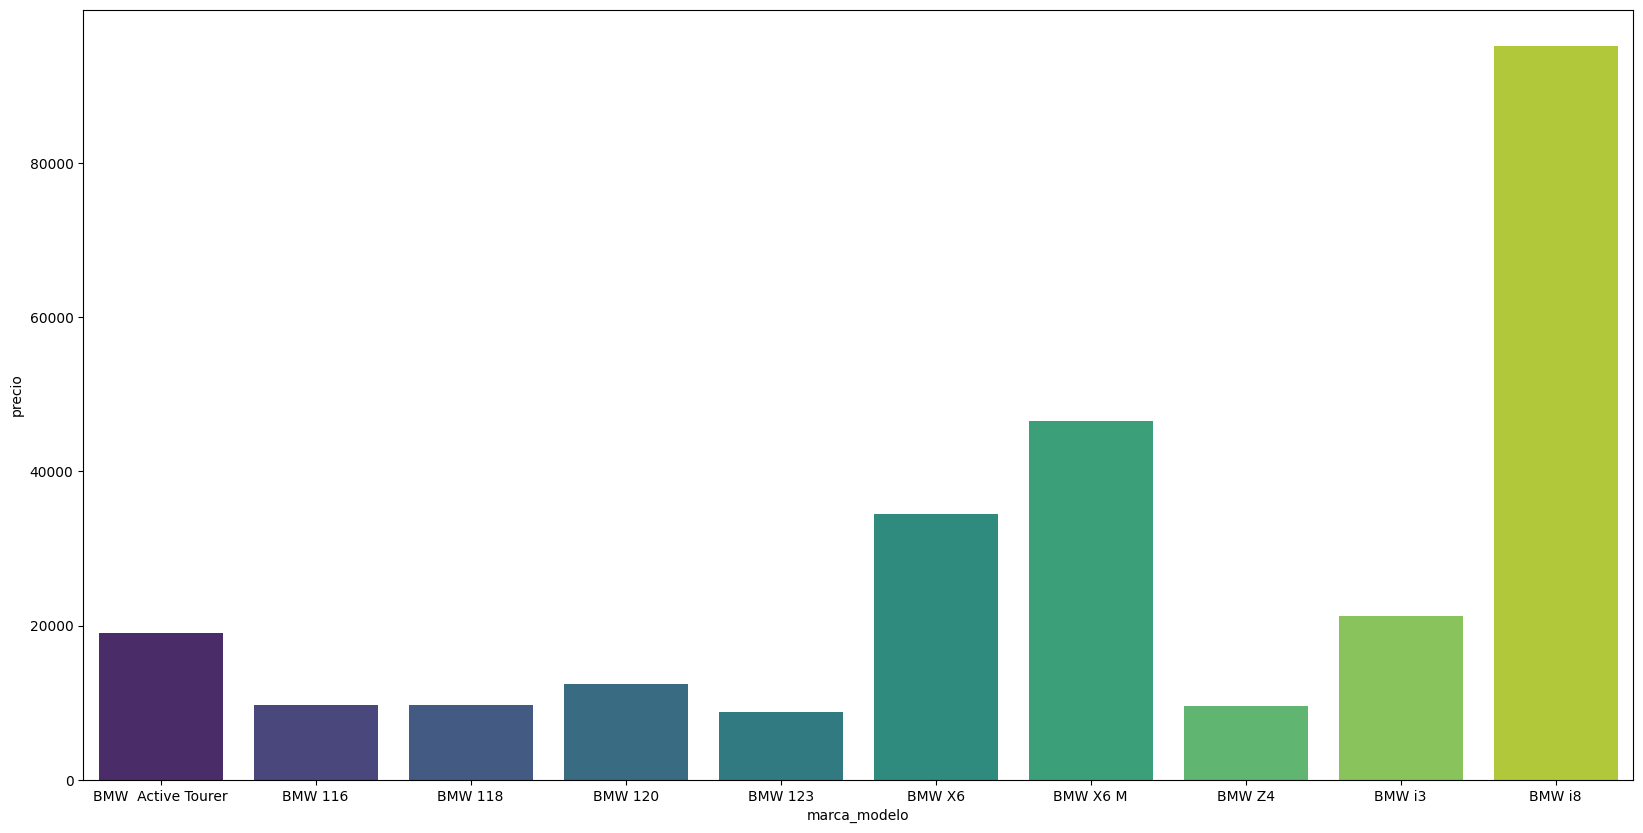

In [129]:
plt.figure(figsize=(20, 10))

sns.barplot(data=df_marca_modelo_2, x='marca_modelo', y='precio', palette='viridis')
plt.show()

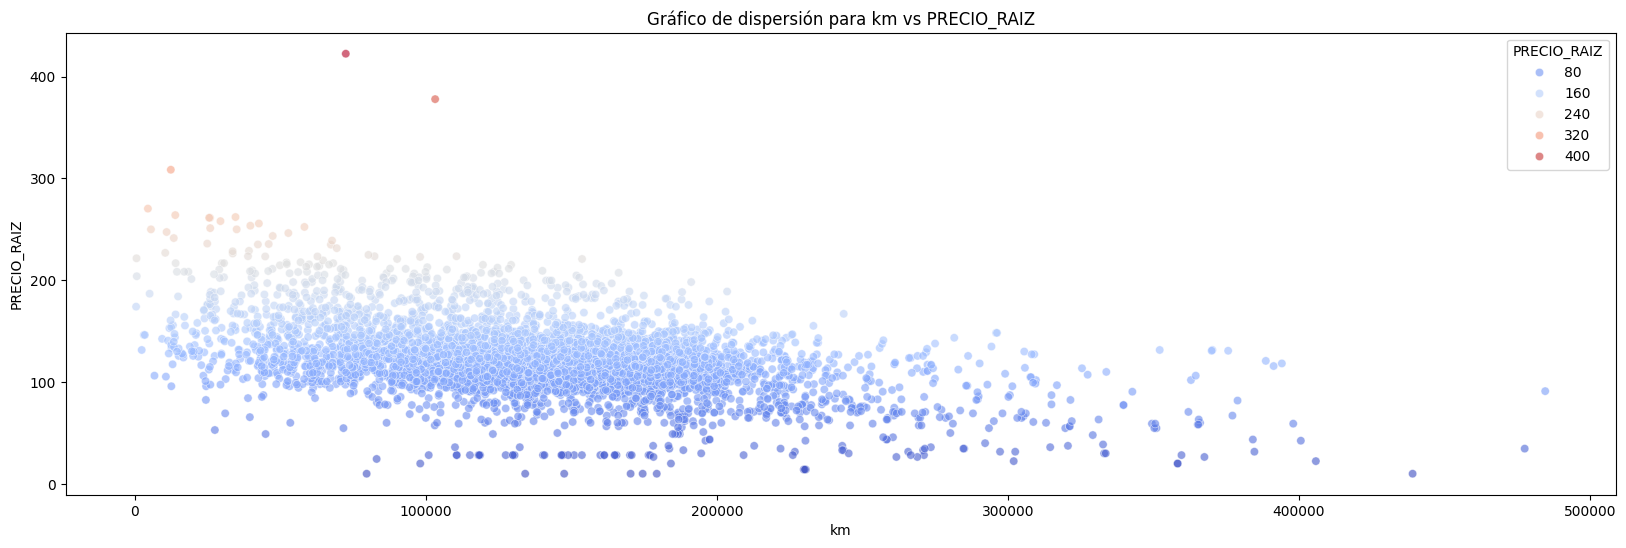

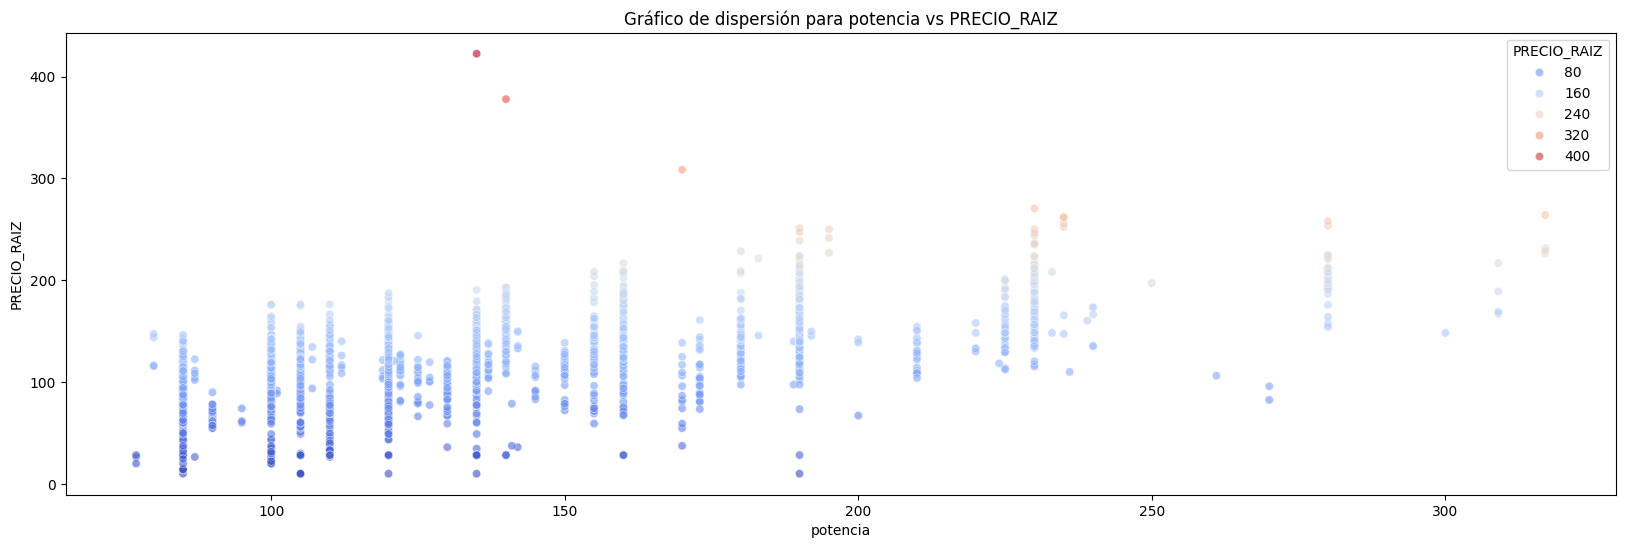

<ipython-input-63-71b0348d54a9>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=i, y=target, data=dataframe, inner="box", palette="muted")


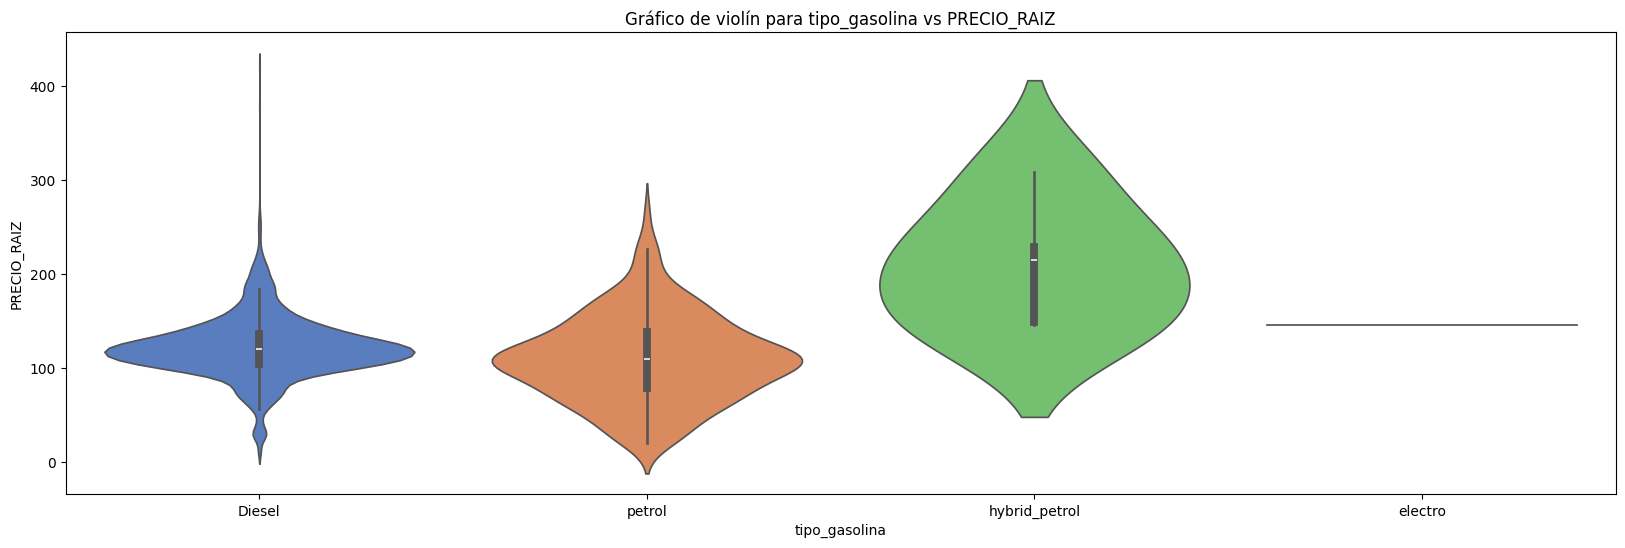

<ipython-input-63-71b0348d54a9>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=i, y=target, data=dataframe, inner="box", palette="muted")


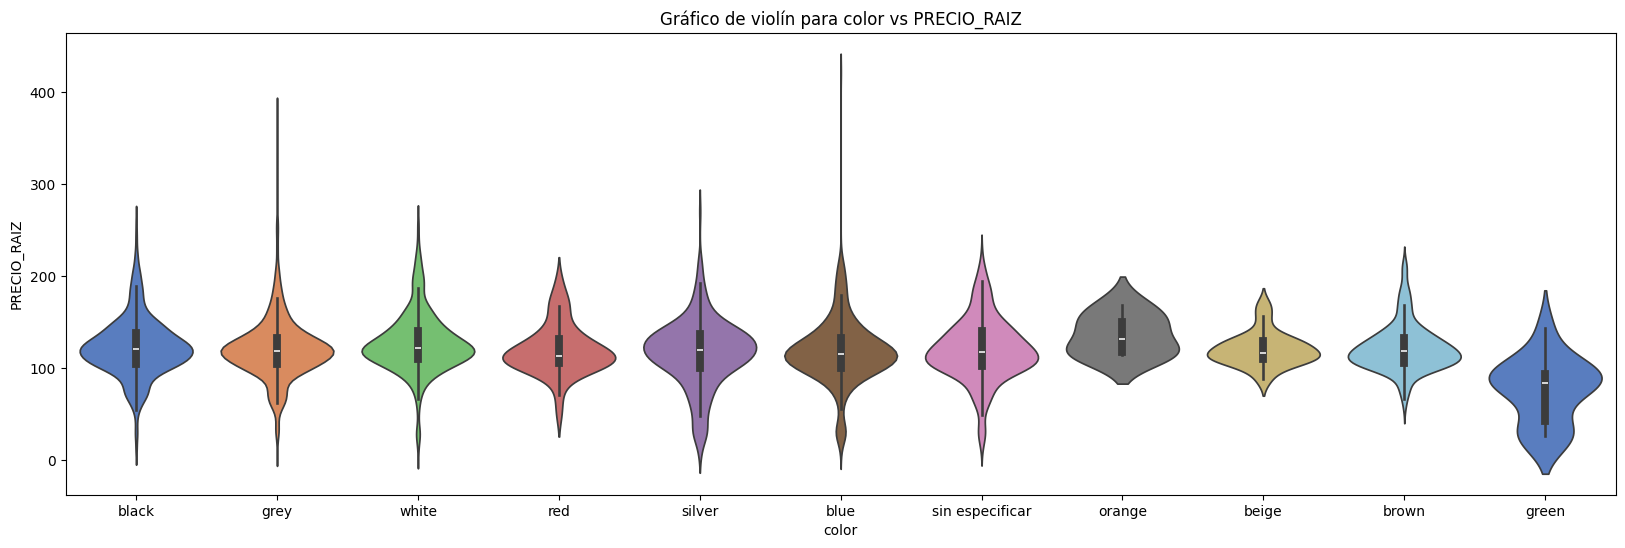

<ipython-input-63-71b0348d54a9>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=i, y=target, data=dataframe, inner="box", palette="muted")


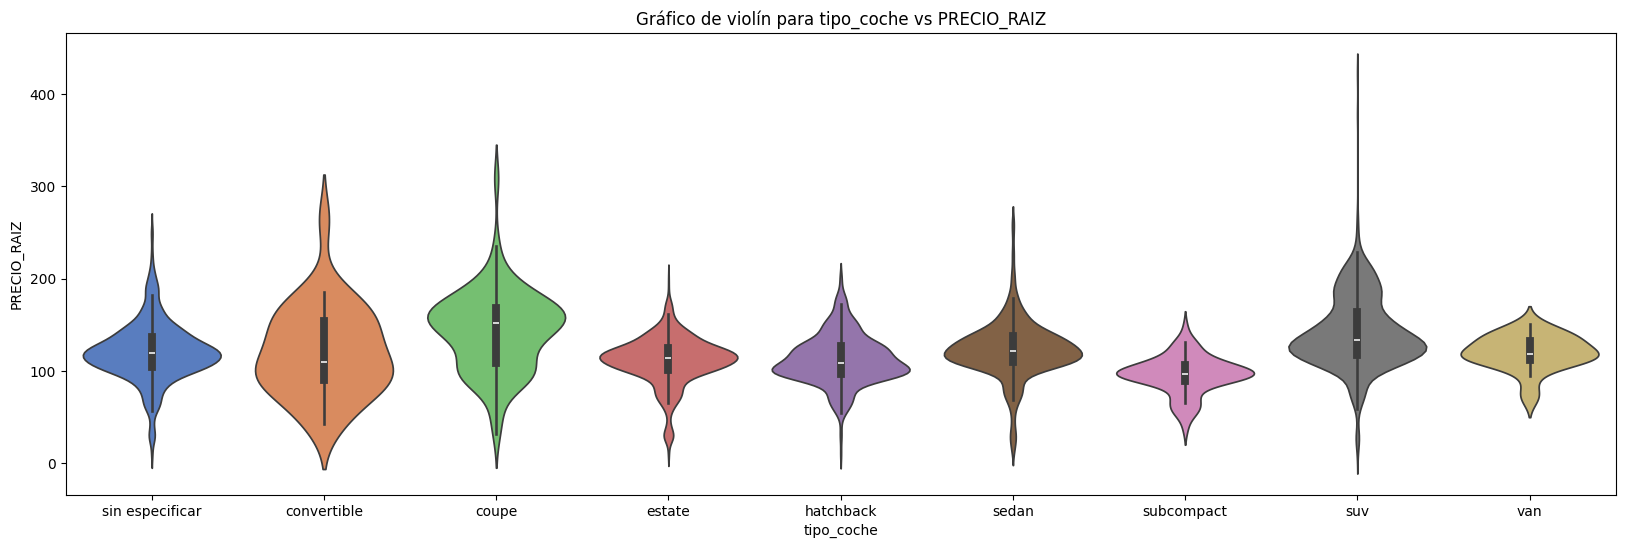

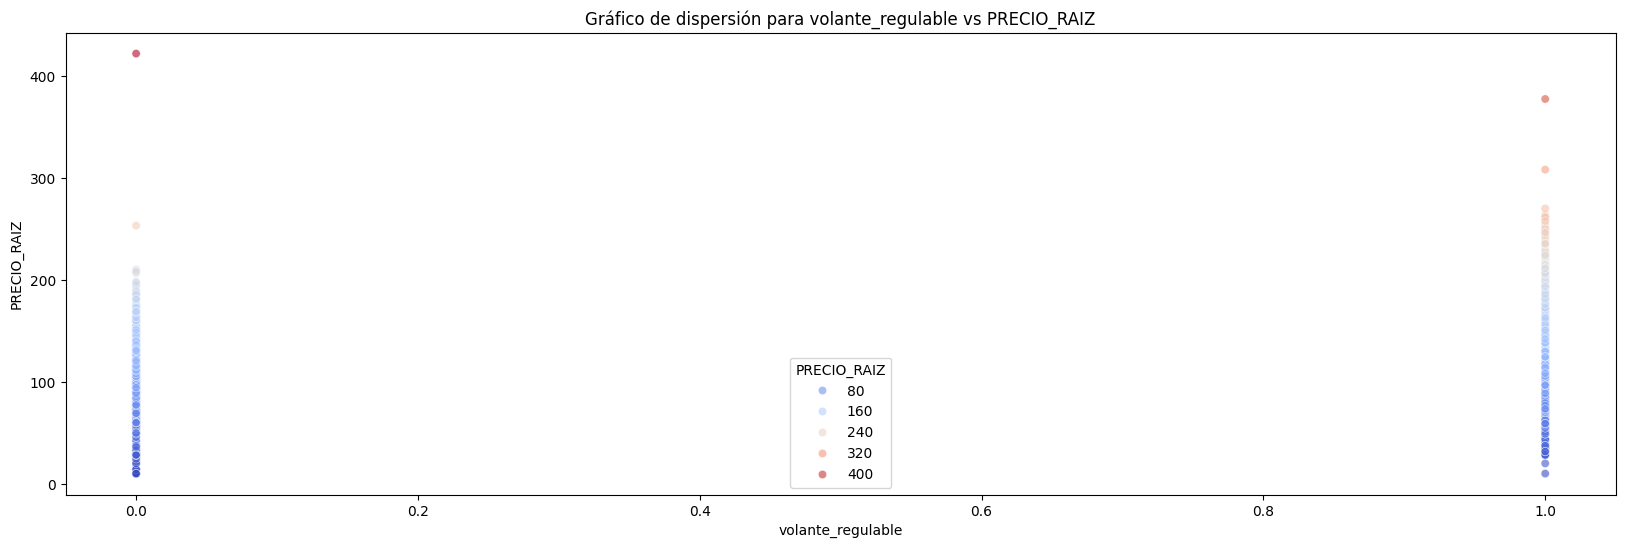

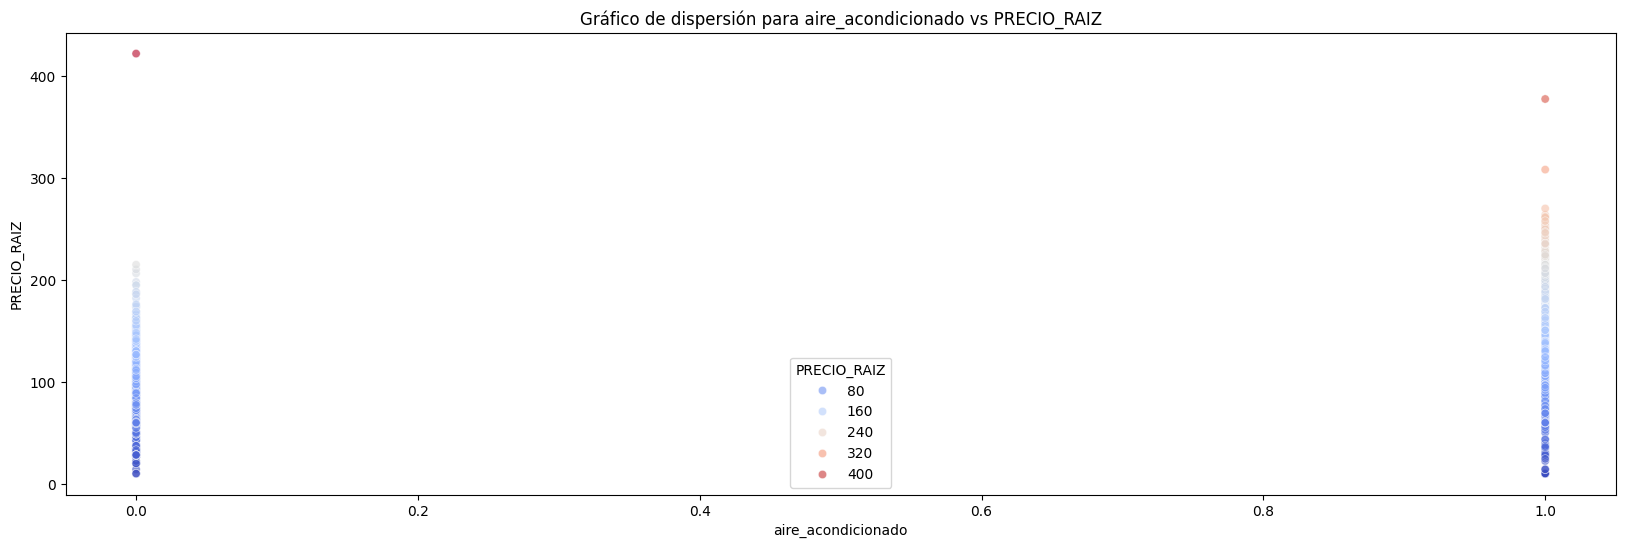

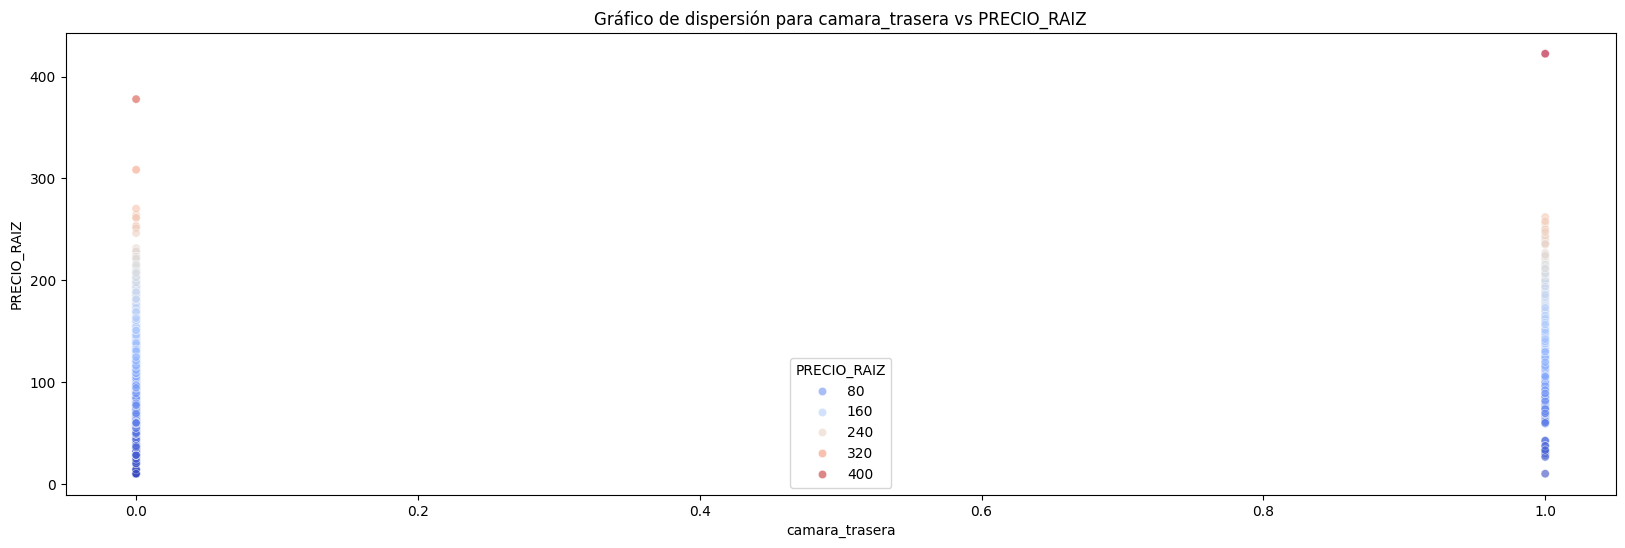

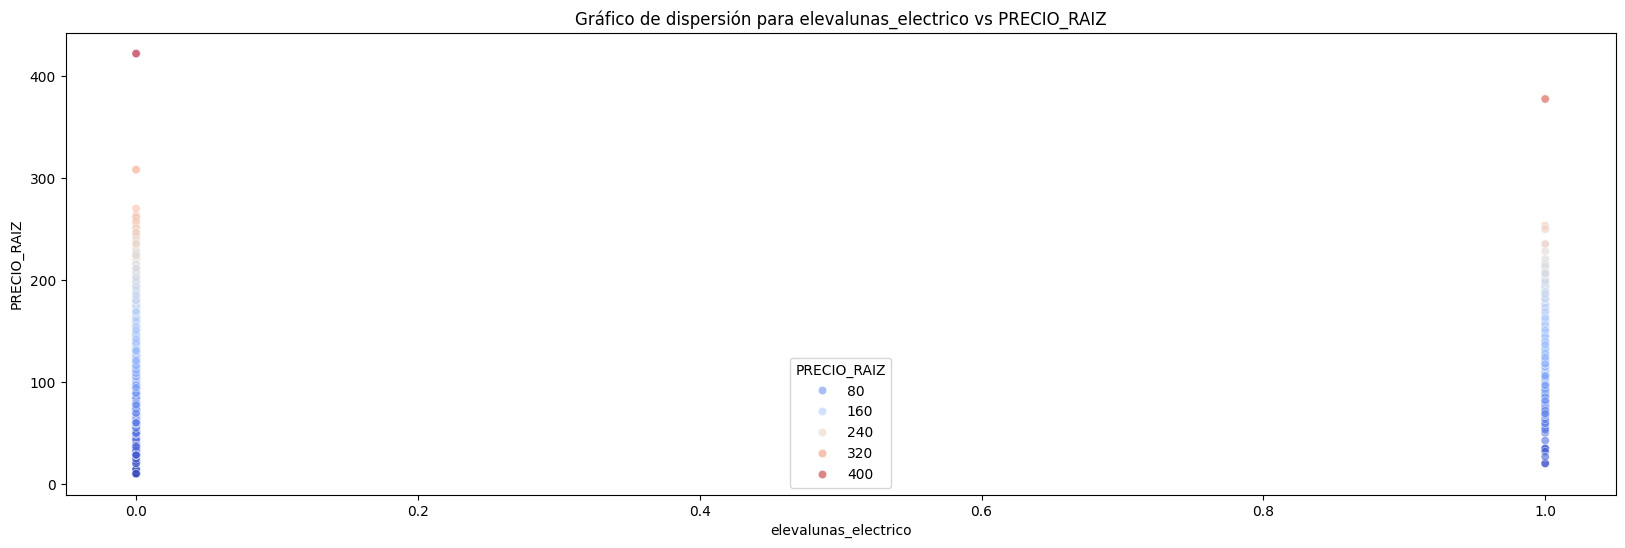

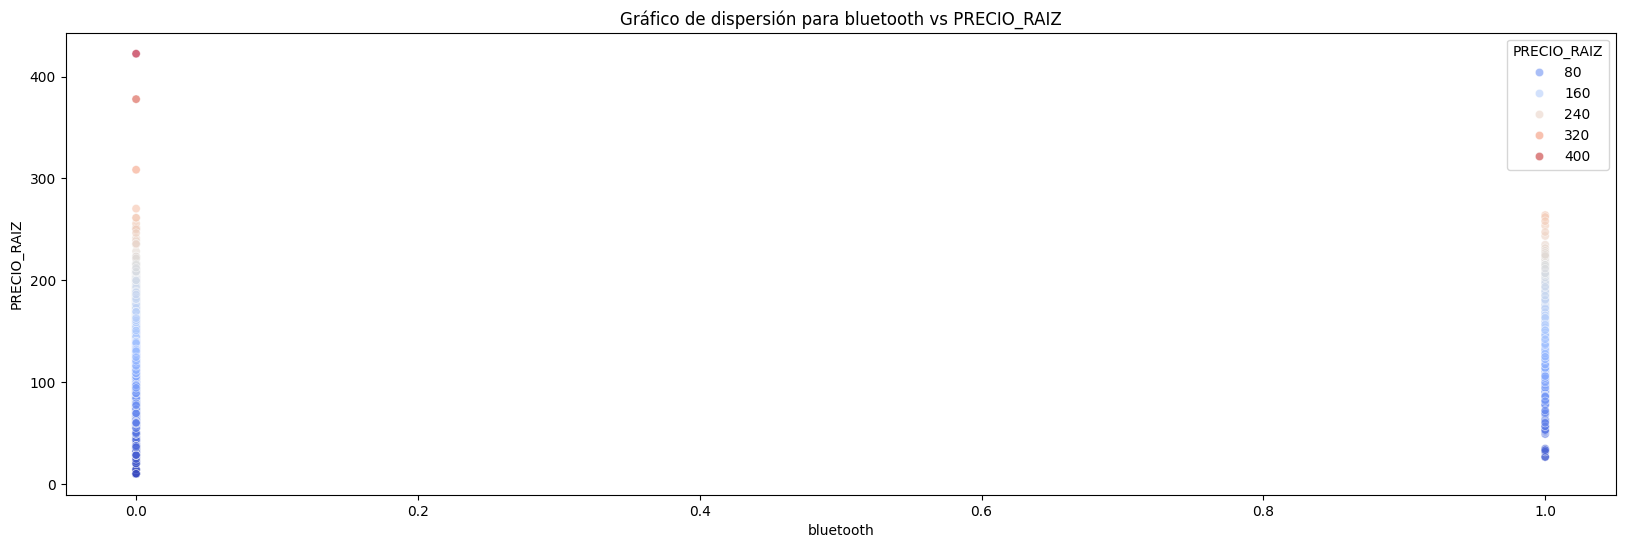

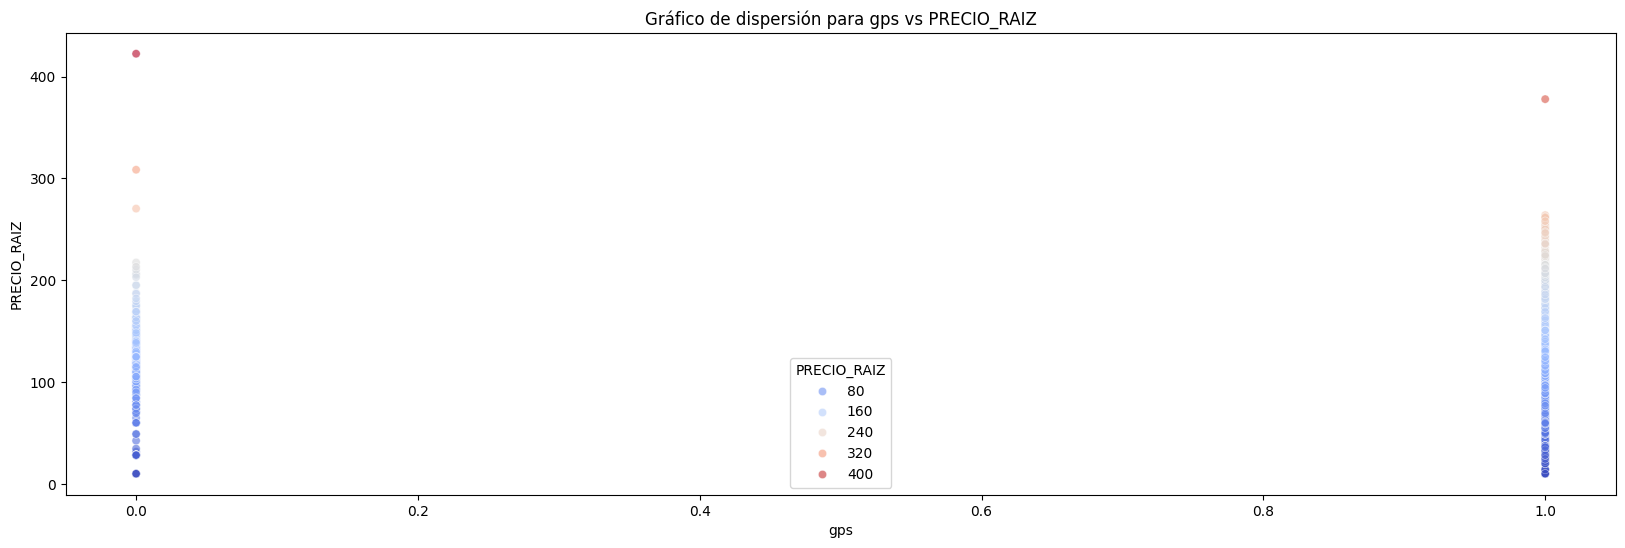

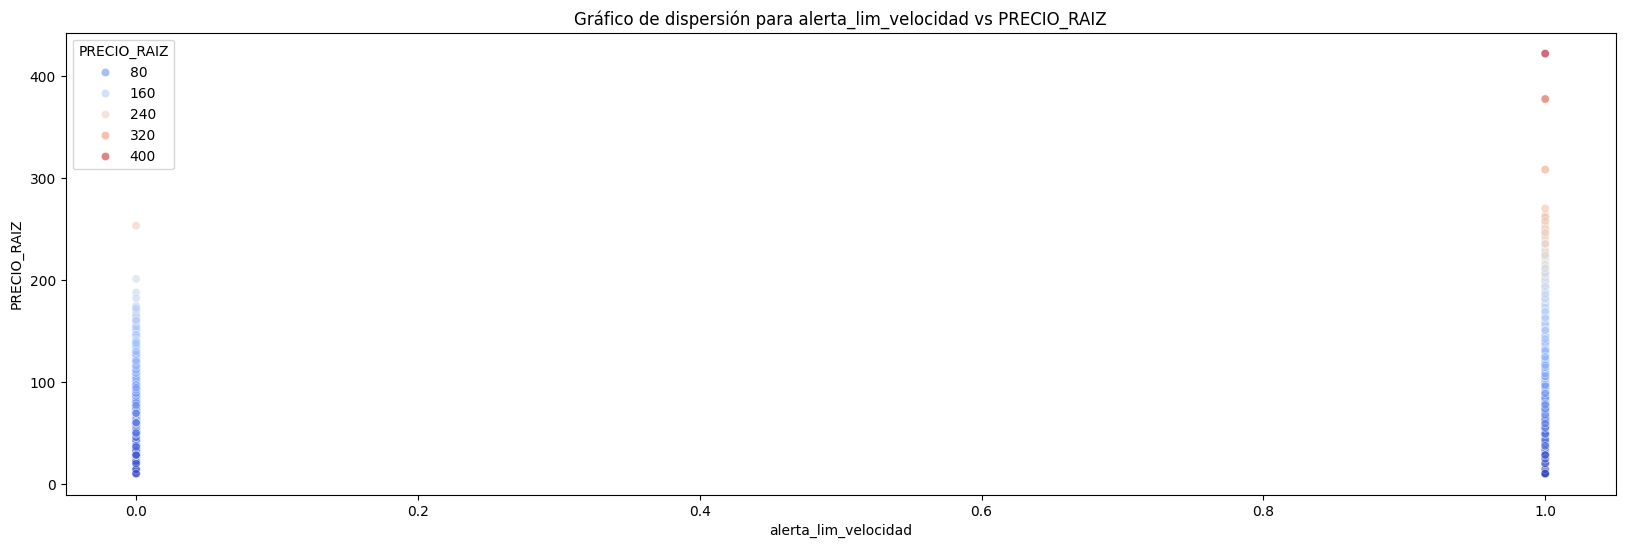

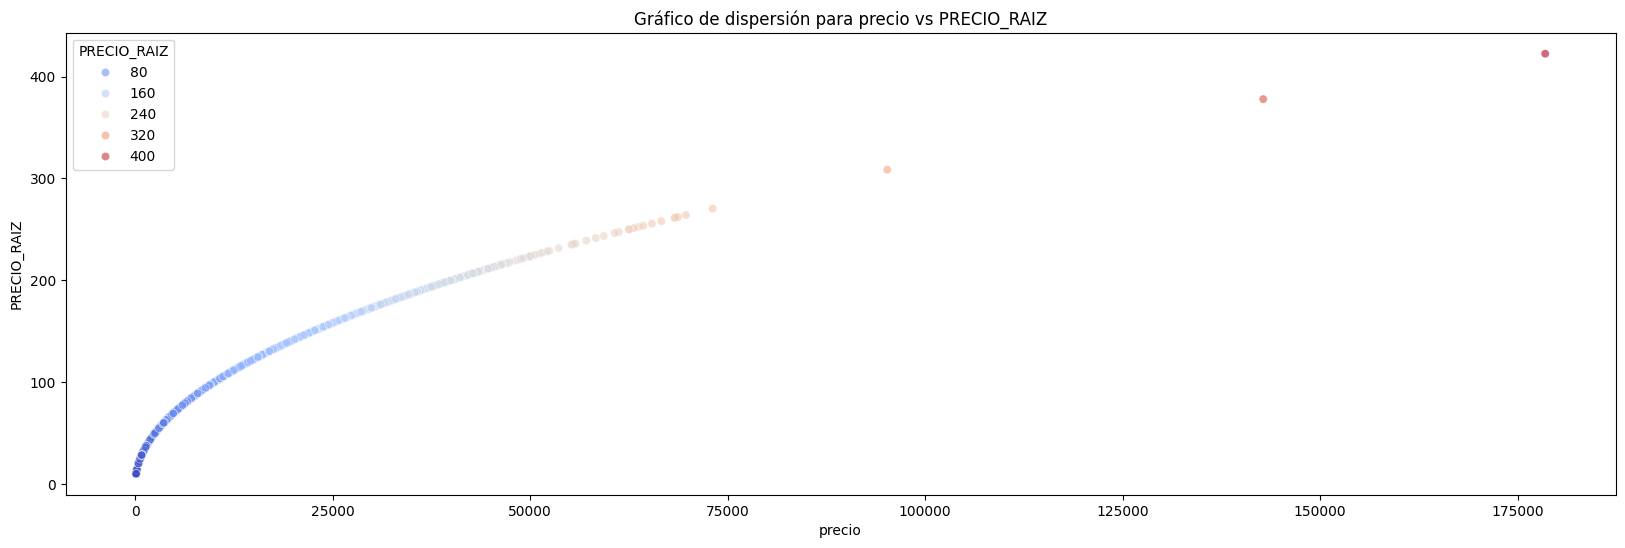

<ipython-input-63-71b0348d54a9>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=i, y=target, data=dataframe, inner="box", palette="muted")


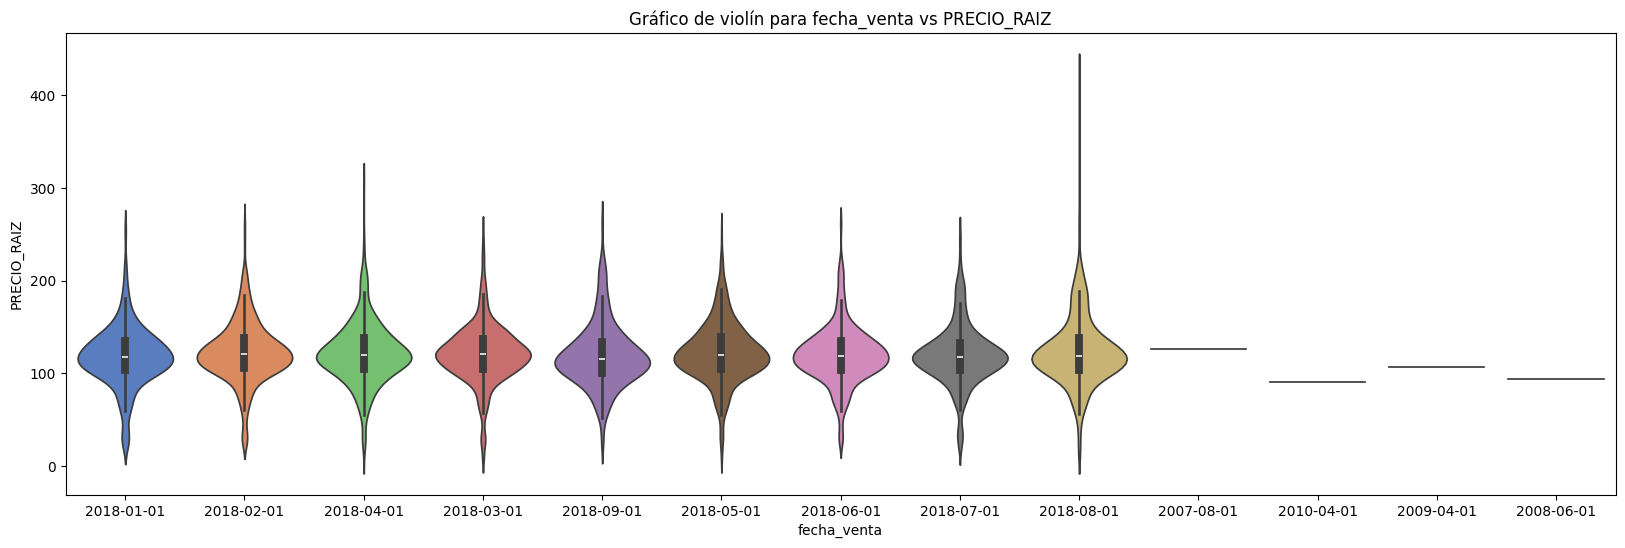

<ipython-input-63-71b0348d54a9>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=i, y=target, data=dataframe, inner="box", palette="muted")


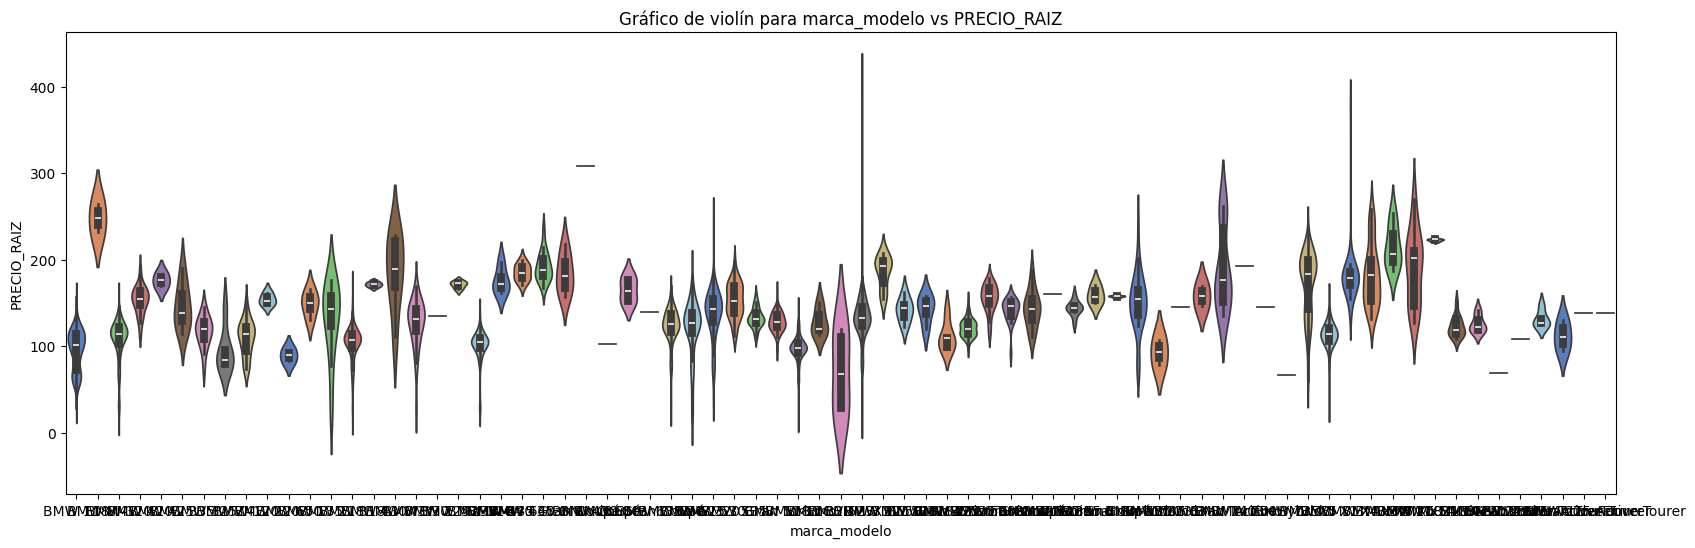

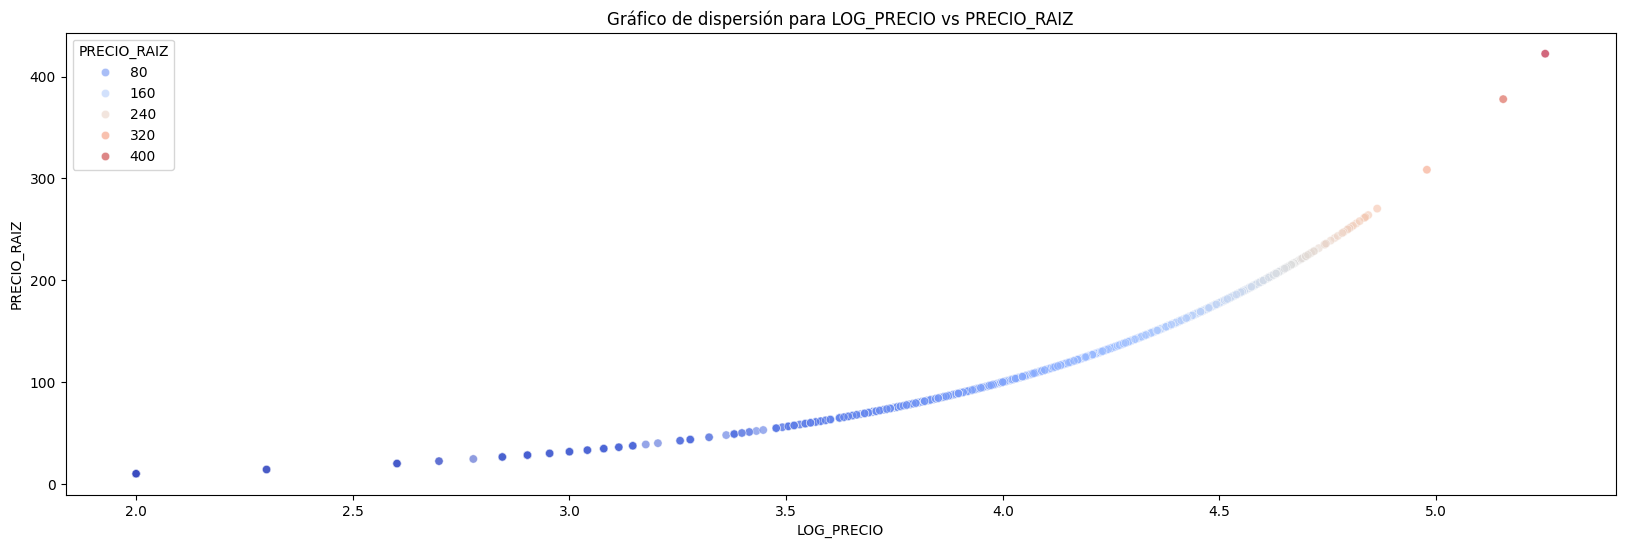

In [65]:
visualize_data(df_bmw2, 'PRECIO_RAIZ')

# OHE & MinMax

In [66]:
target= ['precio','LOG_PRECIO','PRECIO_RAIZ']

In [67]:
def obtener_lista_variables(dataset):

    lista_numericas=[]
    lista_boolean=[]
    lista_categoricas=[]

    for i in dataset:
        if    (dataset[i].dtype.kind in ("f","i")) and len(dataset[i].unique())!= 2 and i not in target:
              lista_numericas.append(i)
        elif  (dataset[i].dtype.kind in ("f","i")) and len(dataset[i].unique())== 2 and i not in target:
              lista_boolean.append(i)
        elif  (dataset[i].dtype.kind == "O") and i not in target:
              lista_categoricas.append(i)

    return lista_numericas, lista_boolean, lista_categoricas

In [68]:
lista_numericas, lista_boolean, lista_categoricas = obtener_lista_variables(df_bmw2)

In [69]:
lista_numericas

['km', 'potencia']

In [70]:
lista_boolean

['volante_regulable',
 'aire_acondicionado',
 'camara_trasera',
 'elevalunas_electrico',
 'bluetooth',
 'gps',
 'alerta_lim_velocidad']

In [71]:
lista_categoricas

['tipo_gasolina', 'color', 'tipo_coche', 'fecha_venta', 'marca_modelo']

In [72]:
df_bmw3 = pd.get_dummies(df_bmw2, columns=lista_categoricas)

In [73]:
pd.set_option('display.max_columns', None)

In [74]:
df_bmw3.head()

km  potencia  volante_regulable  aire_acondicionado  camara_trasera  \
0  140411.0     100.0                  1                   1               0   
1   13929.0     317.0                  1                   1               0   
2  183297.0     120.0                  0                   0               0   
3  128035.0     135.0                  1                   1               0   
4   97097.0     160.0                  1                   1               0   

   elevalunas_electrico  bluetooth  gps  alerta_lim_velocidad   precio  \
0                     1          0    1                     1  11300.0   
1                     0          1    1                     1  69700.0   
2                     1          0    1                     0  10200.0   
3                     1          1    1                     1  25100.0   
4                     0          1    1                     1  33400.0   

   LOG_PRECIO  PRECIO_RAIZ  tipo_gasolina_Diesel  tipo_gasolina_electro  \
0    4.053078   106.301458                  True                  False   
1    4.843233   264.007576                 False                  False   
2    4.008600   100.995049                  True                  False   
3    4.399674   158.429795                  True                  False   
4    4.523746   182.756669                  True                  False   

   tipo_gasolina_hybrid_petrol  tipo_gasolina_petrol  color_beige  \
0                        False                 False        False   
1                        False                  True        False   
2                        False                 False        False   
3                        False                 False        False   
4                        False                 False        False   

   color_black  color_blue  color_brown  color_green  color_grey  \
0         True       False        False        False       False   
1        False       False        False        False        True   
2        False       False        False        False       False   
3        False       False        False        False       False   
4        False       False        False        False       False   

   color_orange  color_red  color_silver  color_sin especificar  color_white  \
0         False      False         False                  False        False   
1         False      False         False                  False        False   
2         False      False         False                  False         True   
3         False       True         False                  False        False   
4         False      False          True                  False        False   

   tipo_coche_convertible  tipo_coche_coupe  tipo_coche_estate  \
0                   False             False              False   
1                    True             False              False   
2                   False             False              False   
3                    True             False              False   
4                   False             False              False   

   tipo_coche_hatchback  tipo_coche_sedan  tipo_coche_sin especificar  \
0                 False             False                        True   
1                 False             False                       False   
2                 False             False                        True   
3                 False             False                       False   
4                 False             False                        True   

   tipo_coche_subcompact  tipo_coche_suv  tipo_coche_van  \
0                  False           False           False   
1                  False           False           False   
2                  False           False           False   
3                  False           False           False   
4                  False           False           False   

   fecha_venta_2007-08-01  fecha_venta_2008-06-01  fecha_venta_2009-04-01  \
0                   False                   False    

In [75]:
lista_numericas

['km', 'potencia']

In [76]:
MinMax = MinMaxScaler()

In [77]:
df_bmw3[lista_numericas] = MinMax.fit_transform(df_bmw3[lista_numericas])

In [78]:
df_bmw3.head()

km  potencia  volante_regulable  aire_acondicionado  camara_trasera  \
0  0.289039  0.095833                  1                   1               0   
1  0.027787  1.000000                  1                   1               0   
2  0.377621  0.179167                  0                   0               0   
3  0.263476  0.241667                  1                   1               0   
4  0.199573  0.345833                  1                   1               0   

   elevalunas_electrico  bluetooth  gps  alerta_lim_velocidad   precio  \
0                     1          0    1                     1  11300.0   
1                     0          1    1                     1  69700.0   
2                     1          0    1                     0  10200.0   
3                     1          1    1                     1  25100.0   
4                     0          1    1                     1  33400.0   

   LOG_PRECIO  PRECIO_RAIZ  tipo_gasolina_Diesel  tipo_gasolina_electro  \
0    4.053078   106.301458                  True                  False   
1    4.843233   264.007576                 False                  False   
2    4.008600   100.995049                  True                  False   
3    4.399674   158.429795                  True                  False   
4    4.523746   182.756669                  True                  False   

   tipo_gasolina_hybrid_petrol  tipo_gasolina_petrol  color_beige  \
0                        False                 False        False   
1                        False                  True        False   
2                        False                 False        False   
3                        False                 False        False   
4                        False                 False        False   

   color_black  color_blue  color_brown  color_green  color_grey  \
0         True       False        False        False       False   
1        False       False        False        False        True   
2        False       False        False        False       False   
3        False       False        False        False       False   
4        False       False        False        False       False   

   color_orange  color_red  color_silver  color_sin especificar  color_white  \
0         False      False         False                  False        False   
1         False      False         False                  False        False   
2         False      False         False                  False         True   
3         False       True         False                  False        False   
4         False      False          True                  False        False   

   tipo_coche_convertible  tipo_coche_coupe  tipo_coche_estate  \
0                   False             False              False   
1                    True             False              False   
2                   False             False              False   
3                    True             False              False   
4                   False             False              False   

   tipo_coche_hatchback  tipo_coche_sedan  tipo_coche_sin especificar  \
0                 False             False                        True   
1                 False             False                       False   
2                 False             False                        True   
3                 False             False                       False   
4                 False             False                        True   

   tipo_coche_subcompact  tipo_coche_suv  tipo_coche_van  \
0                  False           False           False   
1                  False           False           False   
2                  False           False           False   
3                  False           False           False   
4                  False           False           False   

   fecha_venta_2007-08-01  fecha_venta_2008-06-01  fecha_venta_2009-04-01  \
0                   False                   False    

# ESTUDIO DE CORRELACIONES LUEGO DEL OHE

In [79]:
corr = df_bmw3.corr()

In [80]:
corr.style.background_gradient(cmap='coolwarm')

In [81]:
corr2 = corr.where(np.triu(np.ones(corr.shape),k=1).astype(bool)) # Nos quedamos con el triangulo superior

In [82]:
corr2

km  potencia  volante_regulable  aire_acondicionado  \
km                    NaN -0.051849           0.063400            0.019354   
potencia              NaN       NaN           0.323834            0.177870   
volante_regulable     NaN       NaN                NaN            0.283862   
aire_acondicionado    NaN       NaN                NaN                 NaN   
camara_trasera        NaN       NaN                NaN                 NaN   
...                    ..       ...                ...                 ...   
marca_modelo_BMW X6   NaN       NaN                NaN                 NaN   
marca_modelo_BMW X6 M NaN       NaN                NaN                 NaN   
marca_modelo_BMW Z4   NaN       NaN                NaN                 NaN   
marca_modelo_BMW i3   NaN       NaN                NaN                 NaN   
marca_modelo_BMW i8   NaN       NaN                NaN                 NaN   

                       camara_trasera  elevalunas_electrico  bluetooth  \
km                           0.003565              0.048072  -0.030571   
potencia                     0.312075              0.342429   0.205103   
volante_regulable            0.253005              0.277839   0.126695   
aire_acondicionado           0.142625              0.258933   0.104990   
camara_trasera                    NaN              0.198197   0.126584   
...                               ...                   ...        ...   
marca_modelo_BMW X6               NaN                   NaN        NaN   
marca_modelo_BMW X6 M             NaN                   NaN        NaN   
marca_modelo_BMW Z4               NaN                   NaN        NaN   
marca_modelo_BMW i3               NaN                   NaN        NaN   
marca_modelo_BMW i8               NaN                   NaN        NaN   

                            gps  alerta_lim_velocidad    precio  LOG_PRECIO  \
km                     0.160037             -0.037479 -0.414804   -0.433587   
potencia               0.004991              0.426112  0.637246    0.506015   
volante_regulable      0.244511              0.186787  0.266177    0.248165   
aire_acondicionado     0.343409              0.169360  0.222609    0.301404   
camara_trasera         0.063480              0.166452  0.250601    0.198166   
...                         ...                   ...       ...         ...   
marca_modelo_BMW X6         NaN                   NaN       NaN         NaN   
marca_modelo_BMW X6 M       NaN                   NaN       NaN         NaN   
marca_modelo_BMW Z4         NaN                   NaN       NaN         NaN   
marca_modelo_BMW i3         NaN                   NaN       NaN         NaN   
marca_modelo_BMW i8         NaN                   NaN       NaN         NaN   

                       PRECIO_RAIZ  tipo_gasolina_Diesel  \
km                       -0.452710              0.038010   
potencia                  0.626169             -0.129973   
volante_regulable         0.277537             -0.000342   
aire_acondicionado        0.278690              0.074033   
camara_trasera            0.244836             -0.010794   
...                            ...                   ...   
marca_modelo_BMW X6            NaN                   NaN   
marca_modelo_BMW X6 M          NaN                   NaN   
marca_modelo_BMW Z4            NaN                   NaN   
marca_modelo_BMW i3            NaN                   NaN   
marca_modelo_BMW i8            NaN                   NaN   

                       tipo_gasolina_electro  tipo_gasolina_hybrid_petrol  \
km                                 -0.023254                    -0.033112   
potencia                           -0.001573                     0.077244   
volante_regulable                   0.012976                     0.029028   
aire_acondicionado                  0.006813                    -0.001453   
camara_trasera                     -0.007250                    -0.016219   
...                                      ...                     

In [83]:
corr3 = corr2.unstack().dropna() # Borramos nulos y modificamos forma tabla

In [84]:
corr3

potencia             km                        -0.051849
volante_regulable    km                         0.063400
                     potencia                   0.323834
aire_acondicionado   km                         0.019354
                     potencia                   0.177870
                                                  ...   
marca_modelo_BMW i8  marca_modelo_BMW X5 M50   -0.000360
                     marca_modelo_BMW X6       -0.001384
                     marca_modelo_BMW X6 M     -0.000550
                     marca_modelo_BMW Z4       -0.000509
                     marca_modelo_BMW i3       -0.000208
Length: 7381, dtype: float64

In [85]:
corr4 = corr3.sort_values() # Ordenamos los valores

In [86]:
pd.set_option('display.max_rows', None)

In [87]:
corr4

tipo_gasolina_petrol                tipo_gasolina_Diesel                 -0.983276
PRECIO_RAIZ                         km                                   -0.452710
LOG_PRECIO                          km                                   -0.433587
precio                              km                                   -0.414804
tipo_coche_sin especificar          tipo_coche_estate                    -0.358949
color_grey                          color_black                          -0.356845
marca_modelo_BMW 116                potencia                             -0.324917
tipo_coche_sin especificar          tipo_coche_sedan                     -0.296971
tipo_coche_suv                      tipo_coche_sin especificar           -0.282847
marca_modelo_BMW 318                potencia                             -0.266088
color_blue                          color_black                          -0.263582
marca_modelo_BMW 316                potencia                             -0.259996
tipo_coche_sedan                    tipo_coche_estate                    -0.247062
tipo_coche_suv                      tipo_coche_estate                    -0.235312
marca_modelo_BMW 116                alerta_lim_velocidad                 -0.232721
color_white                         color_black                          -0.222554
tipo_coche_sin especificar          tipo_coche_hatchback                 -0.218345
color_sin especificar               color_black                          -0.212879
color_grey                          color_blue                           -0.209831
marca_modelo_BMW 116                PRECIO_RAIZ                          -0.205763
marca_modelo_BMW 318                PRECIO_RAIZ                          -0.203698
marca_modelo_BMW 116                volante_regulable                    -0.195432
tipo_coche_suv                      tipo_coche_sedan                     -0.194682
marca_modelo_BMW 318                precio                               -0.192718
marca_modelo_BMW 116                precio                               -0.191402
fecha_venta_2018-05-01              fecha_venta_2018-03-01               -0.190040
marca_modelo_BMW M3                 tipo_gasolina_Diesel                 -0.189294
tipo_coche_convertible              tipo_gasolina_Diesel                 -0.188426
marca_modelo_BMW 320                tipo_coche_suv                       -0.184142
fecha_venta_2018-05-01              fecha_venta_2018-04-01               -0.182789
tipo_coche_hatchback                tipo_coche_estate                    -0.181650
color_white                         color_grey                           -0.177170
marca_modelo_BMW 320                PRECIO_RAIZ                          -0.176471
marca_modelo_BMW 318                LOG_PRECIO                           -0.175706
tipo_coche_hatchback                potencia                             -0.175305
marca_modelo_BMW Z4                 tipo_gasolina_Diesel                 -0.175234
marca_modelo_BMW 528                tipo_gasolina_Diesel                 -0.175234
color_brown                         color_black                          -0.172601
marca_modelo_BMW 320                precio                               -0.172580
fecha_venta_2018-04-01              fecha_venta_2018-03-01               -0.172481
marca_modelo_BMW 116                elevalunas_electrico                 -0.172134
marca_modelo_BMW X3                 tipo_coche_estate                    -0.171170
marca_modelo_BMW 116                LOG_PRECIO                           -0.170585
color_silver                        color_black                          -0.169512
color_sin especificar               color_grey                           -0.169468
fecha_venta_2018-06-01              fecha_venta_2018-05-01               -0.169177
marca_modelo_BMW 520                marca_modelo_BMW 320                 -0.167813
                                    tipo_coche_suv                       -0.165857
tipo_coche_estat

In [88]:
pd.reset_option("display.max_rows")

In [89]:
corr4.head(20)

tipo_gasolina_petrol        tipo_gasolina_Diesel         -0.983276
PRECIO_RAIZ                 km                           -0.452710
LOG_PRECIO                  km                           -0.433587
precio                      km                           -0.414804
tipo_coche_sin especificar  tipo_coche_estate            -0.358949
color_grey                  color_black                  -0.356845
marca_modelo_BMW 116        potencia                     -0.324917
tipo_coche_sin especificar  tipo_coche_sedan             -0.296971
tipo_coche_suv              tipo_coche_sin especificar   -0.282847
marca_modelo_BMW 318        potencia                     -0.266088
color_blue                  color_black                  -0.263582
marca_modelo_BMW 316        potencia                     -0.259996
tipo_coche_sedan            tipo_coche_estate            -0.247062
tipo_coche_suv              tipo_coche_estate            -0.235312
marca_modelo_BMW 116        alerta_lim_velocidad         -0.232721
color_white                 color_black                  -0.222554
tipo_coche_sin especificar  tipo_coche_hatchback         -0.218345
color_sin especificar       color_black                  -0.212879
color_grey                  color_blue                   -0.209831
marca_modelo_BMW 116        PRECIO_RAIZ                  -0.205763
dtype: float64

In [90]:
## eliminamos la variable 'tipo_gasolina_petrol' ya que esta muy correlacionada con la variable 'tipo_gasolina_Diesel'

In [91]:
corr4.tail(20)

LOG_PRECIO                          alerta_lim_velocidad           0.361720
marca_modelo_BMW X5                 precio                         0.362761
marca_modelo_BMW X1                 tipo_coche_suv                 0.369137
marca_modelo_BMW Z4                 tipo_coche_convertible         0.371280
precio                              alerta_lim_velocidad           0.384216
marca_modelo_BMW 116                tipo_coche_hatchback           0.410980
PRECIO_RAIZ                         alerta_lim_velocidad           0.411527
alerta_lim_velocidad                potencia                       0.426112
marca_modelo_BMW 420                tipo_coche_coupe               0.443128
marca_modelo_BMW ActiveHybrid 5     tipo_gasolina_hybrid_petrol    0.447028
marca_modelo_BMW i8                 tipo_gasolina_hybrid_petrol    0.447028
marca_modelo_BMW X3                 tipo_coche_suv                 0.482178
LOG_PRECIO                          potencia                       0.506015
marca_modelo_BMW 218 Active Tourer  tipo_coche_van                 0.522404
PRECIO_RAIZ                         potencia                       0.626169
precio                              potencia                       0.637246
LOG_PRECIO                          precio                         0.808243
PRECIO_RAIZ                         LOG_PRECIO                     0.933215
                                    precio                         0.958103
marca_modelo_BMW i3                 tipo_gasolina_electro          1.000000
dtype: float64

In [92]:
## Podemos observar que las variables 'marca_modelo_BMW i3' y 'tipo_gasolina_electro' estan inversamente correlacionadas